# **Unsmoothing of linear time series**

Let's first import different dependencies and the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import warnings
import seaborn as sns

In [2]:
alternative_data_raw = pd.read_excel('EnsaeAlternativeTimeSeries.xlsx', sheet_name='Alternative Asset', index_col=0)
alternative_data_raw.tail(10)

Commodity - USD Unhedged  Global Property USD Unhedged  \
QUARTER                                                           
2021-Q2                  201.8662                   6229.774805   
2021-Q3                  215.1673                   6184.521678   
2021-Q4                  211.8033                   6825.772548   
2022-Q1                  265.9137                   6568.538826   
2022-Q2                  250.8549                   5436.569419   
2022-Q3                  240.5519                   4817.520307   
2022-Q4                  245.8892                   5159.896609   
2023-Q1                  232.7065                   5213.347074   
2023-Q2                  226.7436                   5241.647937   
2023-Q3                  235.6700                   5167.731061   

         Hedge Fund DJ - USD Unhedged  Infrastructure Debt - USD Unhedged  \
QUARTER                                                                     
2021-Q2                        711.43                             2534.95   
2021-Q3                        719.91                             2544.31   
2021-Q4                        726.66                             2535.15   
2022-Q1                        742.17                             2386.29   
2022-Q2                        725.12                             2267.73   
2022-Q3                        727.68                             2122.80   
2022-Q4                        733.63                             2173.62   
2023-Q1                        735.54                             2241.04   
2023-Q2                        748.09                             2248.24   
2023-Q3                        757.82                             2255.04   

         Infrastructure Equity Listed - USD Unhedged  \
QUARTER                                                
2021-Q2                                          NaN   
2021-Q3                                          NaN   
2021-Q4                                      6096.56   
2022-Q1                                      6552.00   
2022-Q2                                      6065.58   
2022-Q3                                      5481.12   
2022-Q4                                      6086.01   
2023-Q1                                      6325.68   
2023-Q2                                      6318.26   
2023-Q3                                      6104.30   

         Infrastructure Equity USD Unhedged  Nature Capital - USD Hedged  \
QUARTER                                                                    
2021-Q2                          275.181583                  1443.470642   
2021-Q3                          271.066062                  1515.657205   
2021-Q4                          300.214659                  1606.789837   
2022-Q1                          293.265256                  1777.360304   
2022-Q2                          263.147689                  1890.893920   
2022-Q3                          226.816903                  1960.578024   
2022-Q4                          258.409265                  2023.095816   
2023-Q1                          250.338364                  2026.152916   
2023-Q2                          241.619726                          NaN   
2023-Q3                          243.881391                          NaN   

         Private Equity USD Unhedged  UK Property Direct - USD Unhedged  
QUARTER                                                                  
2021-Q2                     4691.699                         278.205508  
2021-Q3                     4897.288                         280.913387  
2021-Q4                     5397.431                         305.081135  
2022-Q1                     4770.109                         290.587837  
2022-Q2                     3612.590                         236.794741  
2022-Q3                     3274.373                         187.833995  
2022-Q4                     3719.178                         210.098219  
2023-Q1                    

# **I. Data Analysis**
## Preprocessing

In [3]:
def tweak_alternative_data(df_):
    return (df_.assign(**{col + '_%y/y': df_[col].pct_change(fill_method = None) for col in df_.columns}) #Adding the returs
            .set_index(pd.to_datetime(df_.index)) #Changing the index format to datetime
            .rename(lambda c: c.replace(' ','_'), axis = 1)) # Replacing the spaces by _ in the names


alternative_data = tweak_alternative_data(alternative_data_raw)
alternative_data.tail(10)

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/2713308186.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .set_index(pd.to_datetime(df_.index)) #Changing the index format to datetime


Commodity_-_USD_Unhedged  Global_Property_USD_Unhedged  \
QUARTER                                                              
2021-04-01                  201.8662                   6229.774805   
2021-07-01                  215.1673                   6184.521678   
2021-10-01                  211.8033                   6825.772548   
2022-01-01                  265.9137                   6568.538826   
2022-04-01                  250.8549                   5436.569419   
2022-07-01                  240.5519                   4817.520307   
2022-10-01                  245.8892                   5159.896609   
2023-01-01                  232.7065                   5213.347074   
2023-04-01                  226.7436                   5241.647937   
2023-07-01                  235.6700                   5167.731061   

            Hedge_Fund_DJ_-_USD_Unhedged  Infrastructure_Debt_-_USD_Unhedged  \
QUARTER                                                                        
2021-04-01                        711.43                             2534.95   
2021-07-01                        719.91                             2544.31   
2021-10-01                        726.66                             2535.15   
2022-01-01                        742.17                             2386.29   
2022-04-01                        725.12                             2267.73   
2022-07-01                        727.68                             2122.80   
2022-10-01                        733.63                             2173.62   
2023-01-01                        735.54                             2241.04   
2023-04-01                        748.09                             2248.24   
2023-07-01                        757.82                             2255.04   

            Infrastructure_Equity_Listed_-_USD_Unhedged  \
QUARTER                                                   
2021-04-01                                          NaN   
2021-07-01                                          NaN   
2021-10-01                                      6096.56   
2022-01-01                                      6552.00   
2022-04-01                                      6065.58   
2022-07-01                                      5481.12   
2022-10-01                                      6086.01   
2023-01-01                                      6325.68   
2023-04-01                                      6318.26   
2023-07-01                                      6104.30   

            Infrastructure_Equity_USD_Unhedged  Nature_Capital_-_USD_Hedged  \
QUARTER                                                                       
2021-04-01                          275.181583                  1443.470642   
2021-07-01                          271.066062                  1515.657205   
2021-10-01                          300.214659                  1606.789837   
2022-01-01                          293.265256                  1777.360304   
2022-04-01                          263.147689                  1890.893920   
2022-07-01                          226.816903                  1960.578024   
2022-10-01                          258.409265                  2023.095816   
2023-01-01                          250.338364                  2026.152916   
2023-04-01                          241.619726                          NaN   
2023-07-01                          243.881391                          NaN   

            Private_Equity_USD_Unhedged  UK_Property_Direct_-_USD_Unhedged  \
QUARTER                                                                      
2021-04-01                     4691.699                         278.205508   
2021-07-01                     4897.288                         280.913387   
2021-10-01                     5397.431                         305.081135   
2022-01-01                     4770.109                         290.587837   
2022-04-01                     3612.590                         236.794741   
2022-0

##  Data Visualisation

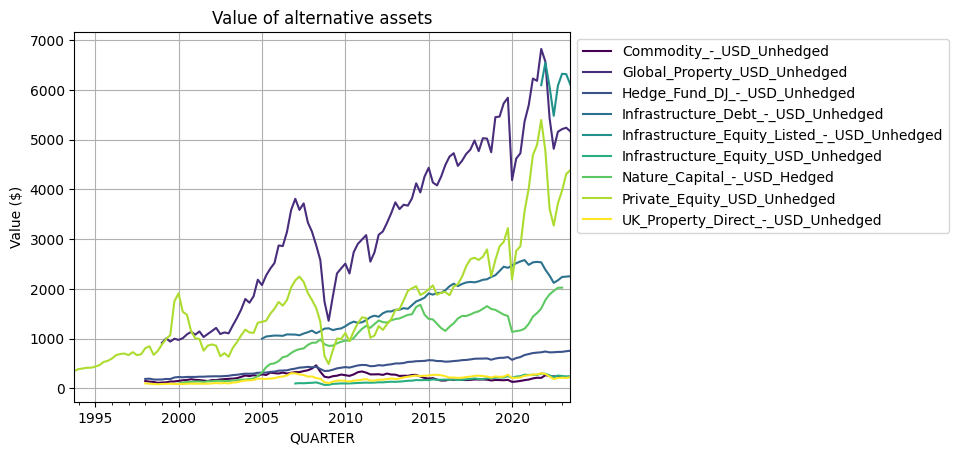

In [4]:
(alternative_data.iloc[:,0:9]
.plot(cmap = 'viridis',grid=True,ylabel='Value ($)', title='Value of alternative assets')
.legend(bbox_to_anchor = (1,1)))

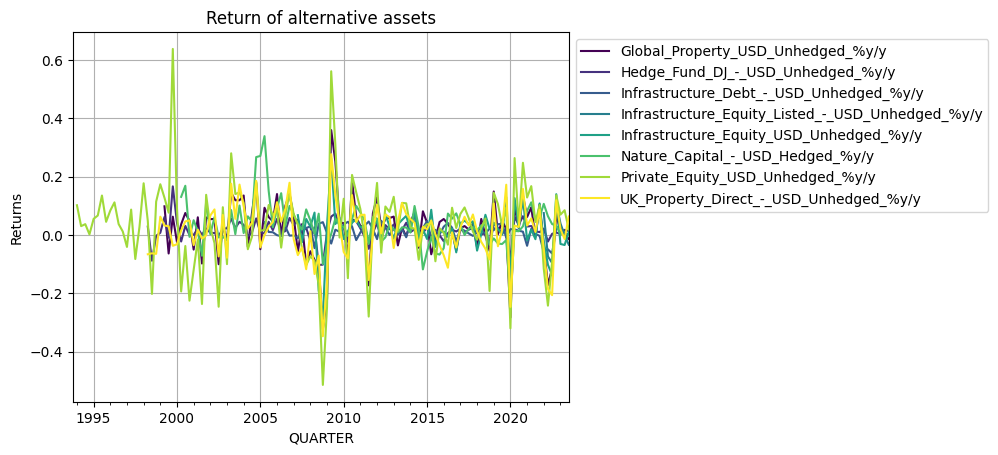

In [5]:
(alternative_data.iloc[:,10:]
.plot(cmap = 'viridis',grid=True,ylabel='Returns', title='Return of alternative assets')
.legend(bbox_to_anchor = (1,1)))

##  Stationarity analysis 

In [6]:
unit_test = {name: (adfuller(alternative_data[name].dropna())[0], adfuller(alternative_data[name].dropna())[1]) 
       for name in alternative_data.iloc[:,10:].columns}

(pd.DataFrame(unit_test, index = ['value','p-value']).T.style.format(precision = 2)
.background_gradient(cmap = 'viridis'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


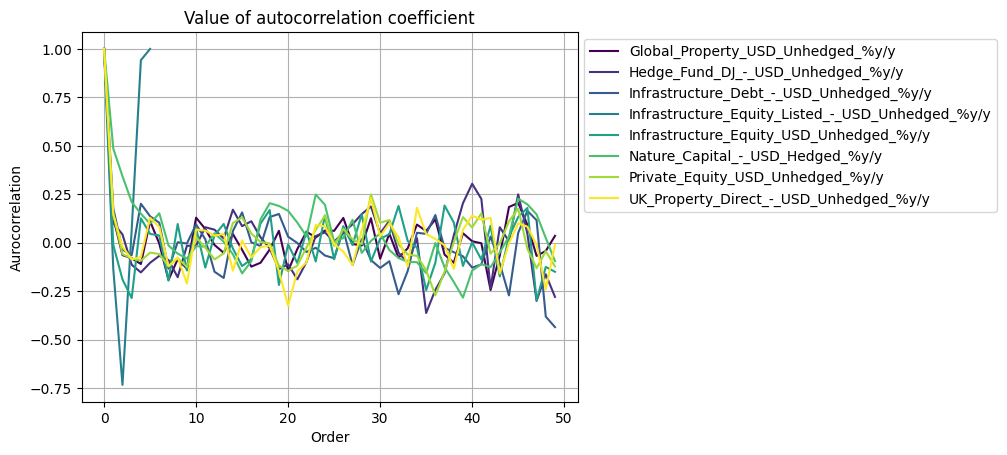

In [7]:
serial_correlation = pd.DataFrame({name:  [alternative_data[name].dropna().autocorr(k) for k in range (50)]
                       for name in alternative_data.iloc[:,10:].columns})

(serial_correlation
.plot(grid = True, cmap  = 'viridis', xlabel='Order', ylabel ='Aurocorrelation', title = 'Value of autocorrelation coefficient' )
.legend(bbox_to_anchor = (1,1)))

# **II. Autoregressive method**
##  Unsmoothing series

In [8]:
from AR_Model.AR_functions import AR_model

In [9]:
def data_unsmoothing(df_):
    new = df_.resample('MS').interpolate(method='polynomial', order = 2)
    for col in df_.columns:
        new[col + '_unsmoothed'] = AR_model(new[col].values)
    return new


unsmoothed = data_unsmoothing(alternative_data.iloc[:,9:])
unsmoothed.tail(15)

Commodity_-_USD_Unhedged_%y/y  Global_Property_USD_Unhedged_%y/y  \
QUARTER                                                                        
2022-05-01                      -0.093487                          -0.176381   
2022-06-01                      -0.071021                          -0.155571   
2022-07-01                      -0.041072                          -0.113868   
2022-08-01                      -0.010510                          -0.048953   
2022-09-01                       0.016477                           0.029372   
2022-10-01                       0.022188                           0.071069   
2022-11-01                       0.004206                           0.071213   
2022-12-01                      -0.031156                           0.036844   
2023-01-01                      -0.053612                           0.010359   
2023-02-01                      -0.056343                           0.000456   
2023-03-01                      -0.043653                           0.003636   
2023-04-01                      -0.025624                           0.005429   
2023-05-01                      -0.006188                           0.003077   
2023-06-01                       0.015953                          -0.003577   
2023-07-01                       0.039368                          -0.014102   

            Hedge_Fund_DJ_-_USD_Unhedged_%y/y  \
QUARTER                                         
2022-05-01                          -0.020622   
2022-06-01                          -0.006895   
2022-07-01                           0.003530   
2022-08-01                           0.008921   
2022-09-01                           0.009401   
2022-10-01                           0.008177   
2022-11-01                           0.005659   
2022-12-01                           0.002607   
2023-01-01                           0.002603   
2023-02-01                           0.006430   
2023-03-01                           0.012477   
2023-04-01                           0.017062   
2023-05-01                           0.018612   
2023-06-01                           0.017231   
2023-07-01                           0.013006   

            Infrastructure_Debt_-_USD_Unhedged_%y/y  \
QUARTER                                               
2022-05-01                                -0.055896   
2022-06-01                                -0.067673   
2022-07-01                                -0.063910   
2022-08-01                                -0.040776   
2022-09-01                                -0.002668   
2022-10-01                                 0.023940   
2022-11-01                                 0.036792   
2022-12-01                                 0.036375   
2023-01-01                                 0.031017   
2023-02-01                                 0.022036   
2023-03-01                                 0.011611   
2023-04-01                                 0.003213   
2023-05-01                                -0.000882   
2023-06-01                                -0.000946   
2023-07-01                                 0.003025   

            Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y  \
QUARTER                                                        
2022-05-01                                         -0.102969   
2022-06-01                                         -0.117865   
2022-07-01                                         -0.096357   
2022-08-01                                         -0.033209   
2022-09-01                                          0.059176   
2022-10-01                                          0.110359   
2022-11-01                                          0.112890   
2022-12-01                                          0.074151   
2023-01-01                                          0.039380   
2023-02-01                                          0.017881   
2023-03-01                                          0.008436   
2023-04-01                                       

## Results visualisation

### Cumulated returns:

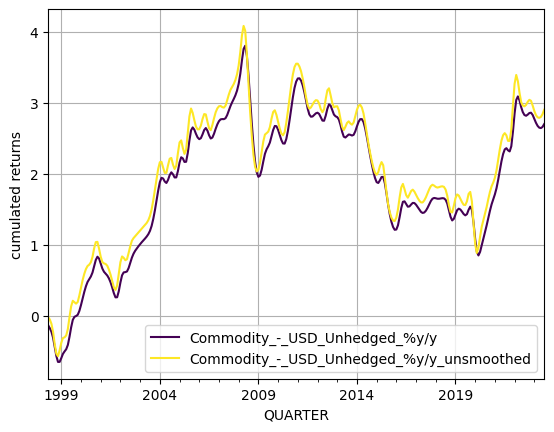

In [10]:
(unsmoothed.iloc[:,[0,9]].cumsum().dropna()
.plot(grid = True, cmap = 'viridis',ylabel='cumulated returns')
.legend())

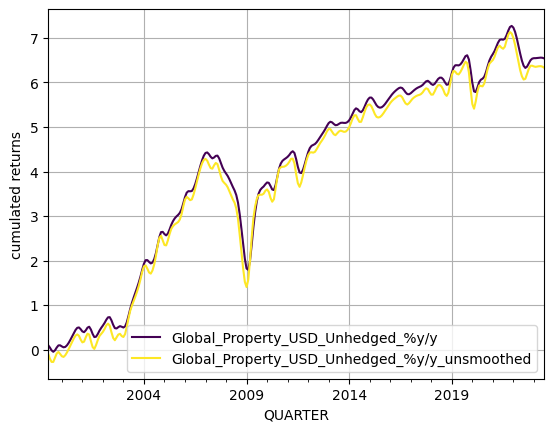

In [11]:
(unsmoothed.iloc[:,[1,10]].cumsum().dropna()
.plot(grid = True, cmap = 'viridis',ylabel='cumulated returns')
.legend())


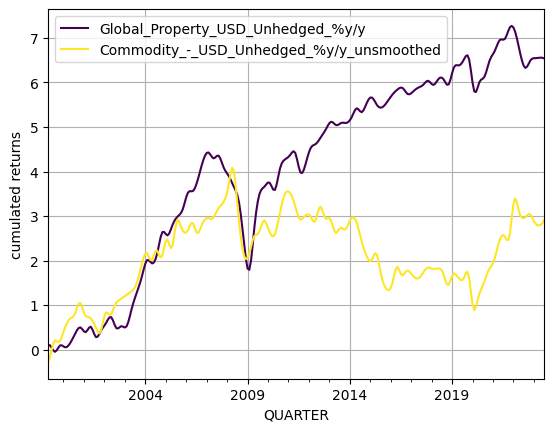

In [12]:
(unsmoothed.iloc[:,[1,9]].cumsum().dropna()
.plot(grid = True, cmap = 'viridis',ylabel='cumulated returns')
.legend())


### Interpolation:

Text(0.5, 1.0, 'Year 2018 interpolation')

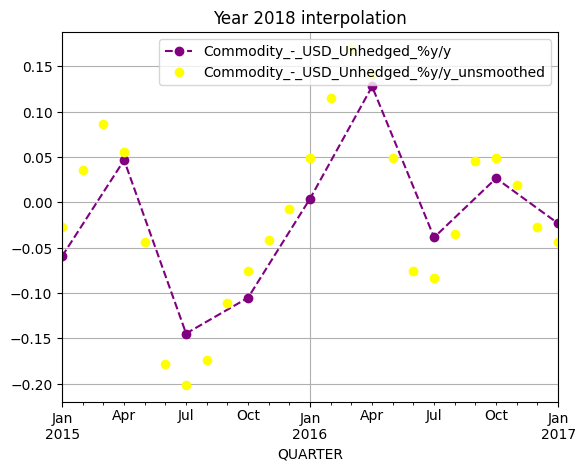

In [13]:
fig, axis = plt.subplots()
(unsmoothed.loc['2015-01-01':'2017-01-01', unsmoothed.columns[0]]
 .iloc[::3]
 .plot(ax = axis, style = 'o--', grid = True, c = 'purple')
 .legend())

(unsmoothed.loc['2015-01-01':'2017-01-01',unsmoothed.columns[9]]
.plot(ax = axis, style = 'o',grid = True, c='yellow')
.legend())

axis.set_title('Year 2018 interpolation')

###  Serial correlation:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


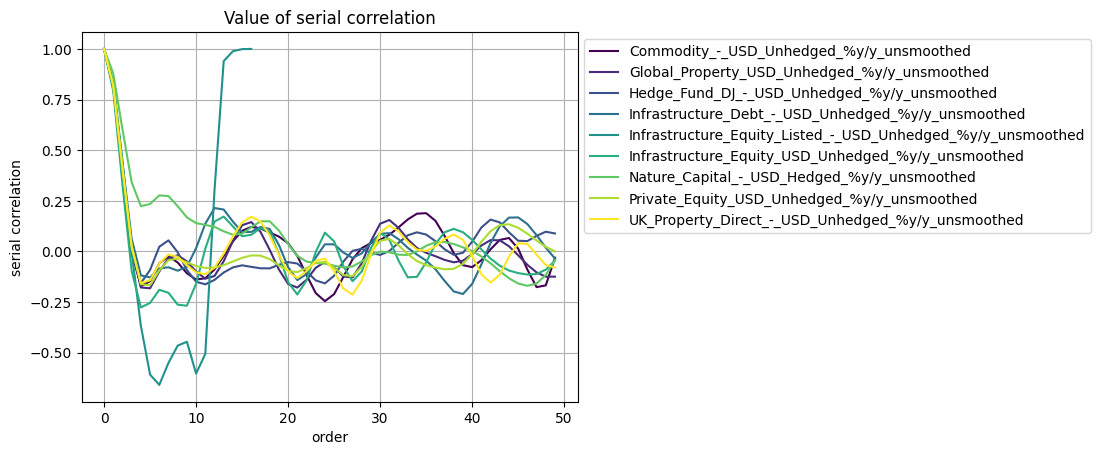

In [14]:
serial_correlation_unsmoothed = pd.DataFrame({name:[unsmoothed[name].dropna().autocorr(k) for k in range (50)]
for name in unsmoothed.iloc[:,9:].columns})

(serial_correlation_unsmoothed
.plot(grid = True, cmap  = 'viridis', xlabel='order', ylabel ='serial correlation', title = 'Value of serial correlation' )
.legend(bbox_to_anchor = (1,1)))

In [15]:
unsmoothed.tail()

Commodity_-_USD_Unhedged_%y/y  Global_Property_USD_Unhedged_%y/y  \
QUARTER                                                                        
2023-03-01                      -0.043653                           0.003636   
2023-04-01                      -0.025624                           0.005429   
2023-05-01                      -0.006188                           0.003077   
2023-06-01                       0.015953                          -0.003577   
2023-07-01                       0.039368                          -0.014102   

            Hedge_Fund_DJ_-_USD_Unhedged_%y/y  \
QUARTER                                         
2023-03-01                           0.012477   
2023-04-01                           0.017062   
2023-05-01                           0.018612   
2023-06-01                           0.017231   
2023-07-01                           0.013006   

            Infrastructure_Debt_-_USD_Unhedged_%y/y  \
QUARTER                                               
2023-03-01                                 0.011611   
2023-04-01                                 0.003213   
2023-05-01                                -0.000882   
2023-06-01                                -0.000946   
2023-07-01                                 0.003025   

            Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y  \
QUARTER                                                        
2023-03-01                                          0.008436   
2023-04-01                                         -0.001173   
2023-05-01                                         -0.011211   
2023-06-01                                         -0.022348   
2023-07-01                                         -0.033864   

            Infrastructure_Equity_USD_Unhedged_%y/y  \
QUARTER                                               
2023-03-01                                -0.048436   
2023-04-01                                -0.034827   
2023-05-01                                -0.020959   
2023-06-01                                -0.005906   
2023-07-01                                 0.009360   

            Nature_Capital_-_USD_Hedged_%y/y  \
QUARTER                                        
2023-03-01                               NaN   
2023-04-01                               NaN   
2023-05-01                               NaN   
2023-06-01                               NaN   
2023-07-01                               NaN   

            Private_Equity_USD_Unhedged_%y/y  \
QUARTER                                        
2023-03-01                          0.078917   
2023-04-01                          0.084293   
2023-05-01                          0.075963   
2023-06-01                          0.053374   
2023-07-01                          0.017983   

            UK_Property_Direct_-_USD_Unhedged_%y/y  \
QUARTER                                              
2023-03-01                               -0.017372   
2023-04-01                               -0.014544   
2023-05-01                               -0.000402   
2023-06-01                                0.025997   
2023-07-01                                0.062951   

            Commodity_-_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                
2023-03-01                                 -0.030963   
2023-04-01                                 -0.007595   
2023-05-01                                  0.013249   
2023-06-01                                  0.038093   
2023-07-01                                  0.062783   

            Global_Property_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                    
2023-03-01                                      0.006816   
2023-04-01                                      0.007221   
2023-05-01                                      0.000725   
2023-06-01                                     -0.010230   
2023-07-01                                     -0.024627   

            Hedge_F

### Volatility:

In [16]:
import numpy as np

def volatility_from_month(x):
    return np.sqrt(12)*x.std()

<Axes: xlabel='QUARTER'>

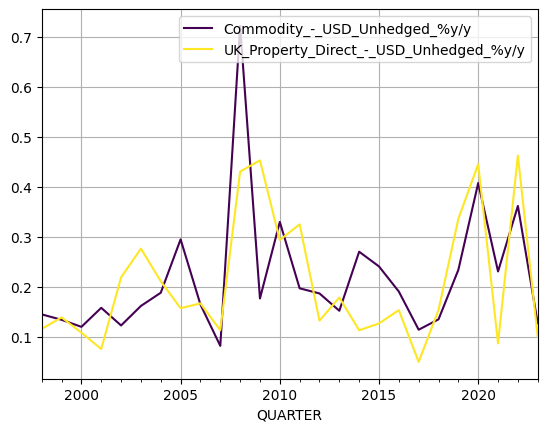

In [17]:
(unsmoothed.iloc[:,[0,8]].resample('YS')
.agg(volatility_from_month)
.dropna()
.plot(grid = True, cmap = 'viridis'))

<Axes: xlabel='QUARTER'>

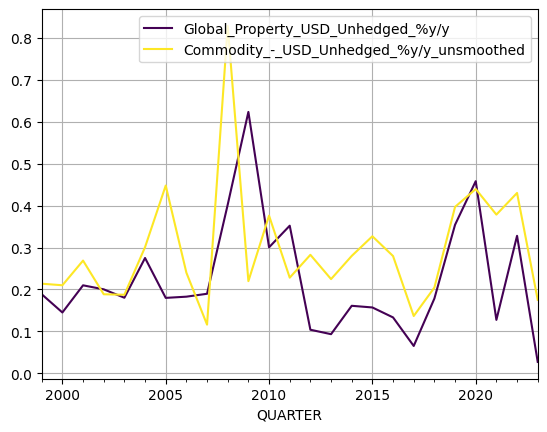

In [18]:
(unsmoothed.iloc[:,[1,9]].resample('YS')
.agg(volatility_from_month)
.dropna()
.plot(grid = True, cmap = 'viridis'))

In [19]:
(unsmoothed[[col for col in unsmoothed.columns if "unsmoothed" in col]]
.dropna()
.resample('YS')
.agg(volatility_from_month))

Commodity_-_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                
2022-01-01                                  0.287032   
2023-01-01                                       NaN   

            Global_Property_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                    
2022-01-01                                      0.425381   
2023-01-01                                           NaN   

            Hedge_Fund_DJ_-_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                    
2022-01-01                                      0.060085   
2023-01-01                                           NaN   

            Infrastructure_Debt_-_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                          
2022-01-01                                           0.176509    
2023-01-01                                                NaN    

            Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                                   
2022-01-01                                           0.389447             
2023-01-01                                                NaN             

            Infrastructure_Equity_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                          
2022-01-01                                           0.489303    
2023-01-01                                                NaN    

            Nature_Capital_-_USD_Hedged_%y/y_unsmoothed  \
QUARTER                                                   
2022-01-01                                     0.079323   
2023-01-01                                          NaN   

            Private_Equity_USD_Unhedged_%y/y_unsmoothed  \
QUARTER                                                   
2022-01-01                                     0.628963   
2023-01-01                                          NaN   

            UK_Property_Direct_-_USD_Unhedged_%y/y_unsmoothed  
QUARTER                                                        
2022-01-01                                           0.613927  
2023-01-01                                                NaN

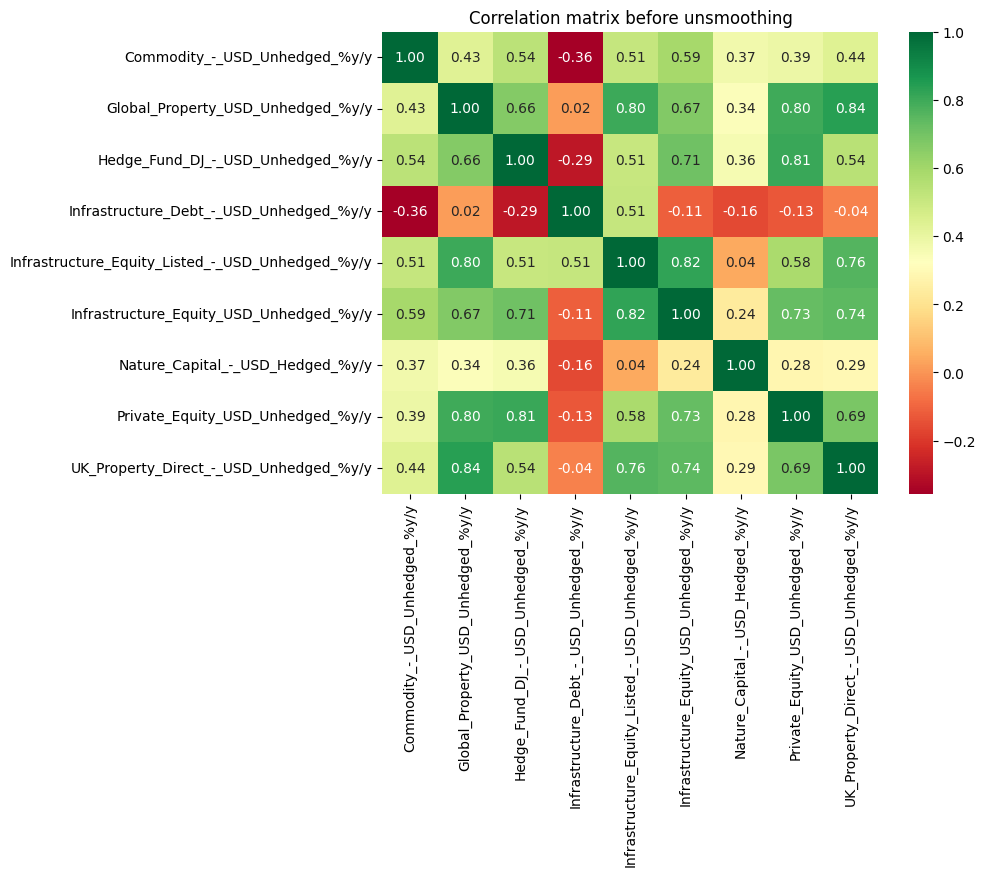

In [20]:
plt.figure(figsize=(8, 6))
corr_matrix  = alternative_data[['Commodity_-_USD_Unhedged_%y/y','Global_Property_USD_Unhedged_%y/y','Hedge_Fund_DJ_-_USD_Unhedged_%y/y'
                                 ,'Infrastructure_Debt_-_USD_Unhedged_%y/y','Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y','Infrastructure_Equity_USD_Unhedged_%y/y'
                                 ,'Nature_Capital_-_USD_Hedged_%y/y','Private_Equity_USD_Unhedged_%y/y','UK_Property_Direct_-_USD_Unhedged_%y/y']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlation matrix before unsmoothing')
plt.show()

In [21]:
plt.figure(figsize=(8, 6))
corr_matrix  = unsmoothed[[col for col in unsmoothed.columns if "unsmoothed" in col]].corr()

(corr_matrix.style
.format(precision = 2)
.background_gradient(cmap = 'RdYlGn', vmin = -1, vmax = 1, axis = None)
.to_latex("Correlation_matrix_after_unsmoothing_quad.tex"))
# sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
# plt.title('Correlation matrix after unsmoothing (linear)')
# plt.show()



<Figure size 800x600 with 0 Axes>

## Alternative: Linear interpolation
###  Applying linear interpolation:

In [22]:
def data_unsmoothing_linear(df_):
    new = df_.resample('MS').interpolate(method='linear')
    for col in df_.columns:
        new[col + '_unsmoothed'] = AR_model(new[col].values)
    return new


unsmoothed_linear = data_unsmoothing_linear(alternative_data.iloc[:,9:])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.wa

Text(0.5, 1.0, 'Year 2018 interpolation')

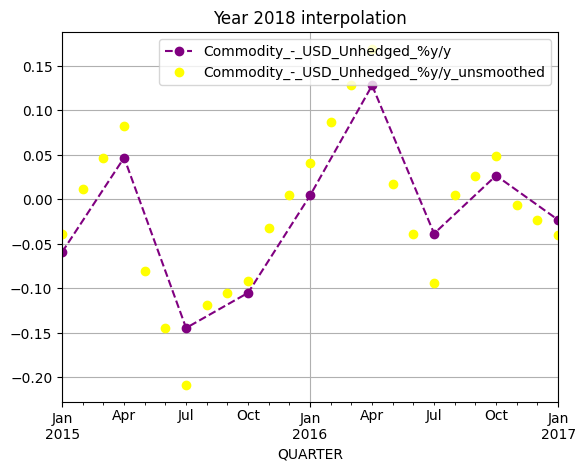

In [23]:
fig, axis = plt.subplots()
(unsmoothed_linear.loc['2015-01-01':'2017-01-01', unsmoothed_linear.columns[0]]
 .iloc[::3]
 .plot(ax = axis, style = 'o--', grid = True, c = 'purple')
 .legend())

(unsmoothed_linear.loc['2015-01-01':'2017-01-01',unsmoothed_linear.columns[9]]
.plot(ax = axis, style = 'o',grid = True, c='yellow')
.legend())

axis.set_title('Year 2018 interpolation')

In [24]:
unsmoothed_linear["Global_Property_USD_Unhedged_%y/y"]

QUARTER
1993-10-01         NaN
1993-11-01         NaN
1993-12-01         NaN
1994-01-01         NaN
1994-02-01         NaN
                ...   
2023-03-01    0.007072
2023-04-01    0.005429
2023-05-01   -0.001082
2023-06-01   -0.007592
2023-07-01   -0.014102
Freq: MS, Name: Global_Property_USD_Unhedged_%y/y, Length: 358, dtype: float64

Text(0.5, 1.0, 'Year 2018 interpolation: Linear vs Quadratic')

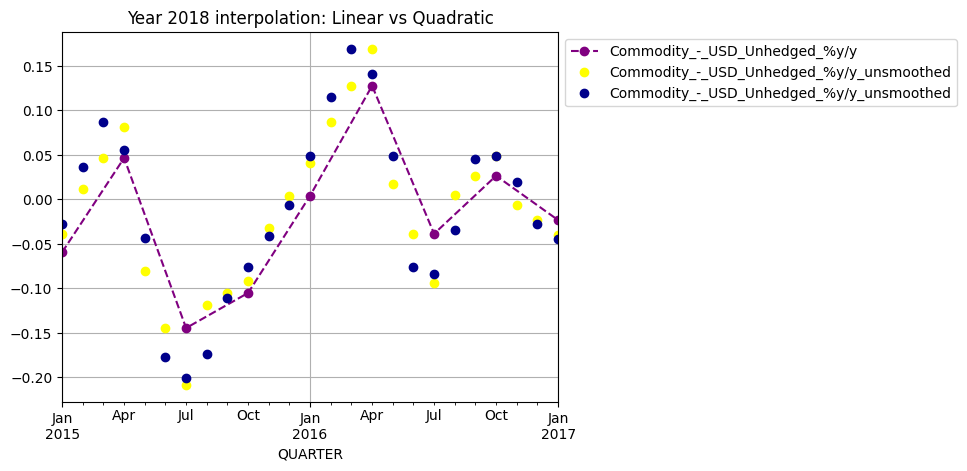

In [25]:
fig, axis = plt.subplots()
(unsmoothed_linear.loc['2015-01-01':'2017-01-01', unsmoothed_linear.columns[0]]
 .iloc[::3]
 .plot(ax = axis, style = 'o--', grid = True, c = 'purple')
 .legend())

(unsmoothed_linear.loc['2015-01-01':'2017-01-01',unsmoothed_linear.columns[9]]
.plot(ax = axis, style = 'o',grid = True, c='yellow')
.legend())

(unsmoothed.loc['2015-01-01':'2017-01-01',unsmoothed.columns[9]]
.plot(ax = axis, style = 'o',grid = True, c='darkblue')
.legend(bbox_to_anchor = (1,1)))

axis.set_title('Year 2018 interpolation: Linear vs Quadratic')

### Correlation matrix for Linear desmoothing

In [26]:
plt.figure(figsize=(8, 6))
corr_matrix  = unsmoothed_linear[[col for col in unsmoothed_linear.columns if "unsmoothed" in col]].corr()
(corr_matrix.style
.format(precision = 2)
.background_gradient(cmap = 'RdYlGn', vmin = -1, vmax = 1, axis = None)
.to_latex("Correlation_matrix_after_unsmoothing_linear.tex"))
# sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
# plt.title('Correlation matrix after unsmoothing (linear)')
# plt.show()

# (pd.DataFrame({name: df[name].dropna()
# for name in alternative_asset_data.columns if "%y/y" in name})
# .resample("QE")
# .last()
# .corr()
# .dropna(how='all', axis = 0)
# .dropna(how='all', axis = 1)
# .style
# .format(precision = 2)
# .background_gradient(cmap = 'RdYlGn', vmin = -1, vmax = 1, axis = None)
# .to_latex('base.tex'))

<Figure size 800x600 with 0 Axes>

### Rolling window (Eh bah non)

In [27]:
def data_unsmoothing(df_):
    new = df_.resample('MS').interpolate(method='polynomial', order = 2)
    for col in df_.columns:
        new[col + '_unsmoothed'] = new[col].rolling(window = 5).apply(lambda x: AR_model(x.to_numpy()))
    return new


unsmoothed = data_unsmoothing(alternative_data.iloc[:,10:])
unsmoothed.tail(15)

TypeError: only length-1 arrays can be converted to Python scalars

## **III. Getmansky, Lo, Makarov Model**

In [28]:
from web_app.apps.Models.getmansky.GetmanskyMain import GetmanskyModel

In [29]:
alternative_asset_data = (
    # Importing the dataset
    pd.read_excel("./EnsaeAlternativeTimeSeries.xlsx", sheet_name= "Alternative Asset", index_col=0)
)

def tweak_data(df_):
    return (df_
            .assign(**{col + '_%y/y': df_[col].pct_change(fill_method = None) for col in df_.columns})
            .rename(lambda c: c.replace(' ','_'), axis = 1)
        )

alternative_asset_data = tweak_data(alternative_asset_data)[1:]
alternative_asset_data

Commodity_-_USD_Unhedged  Global_Property_USD_Unhedged  \
QUARTER                                                           
1994-Q1                       NaN                           NaN   
1994-Q2                       NaN                           NaN   
1994-Q3                       NaN                           NaN   
1994-Q4                       NaN                           NaN   
1995-Q1                       NaN                           NaN   
...                           ...                           ...   
2022-Q3                  240.5519                   4817.520307   
2022-Q4                  245.8892                   5159.896609   
2023-Q1                  232.7065                   5213.347074   
2023-Q2                  226.7436                   5241.647937   
2023-Q3                  235.6700                   5167.731061   

         Hedge_Fund_DJ_-_USD_Unhedged  Infrastructure_Debt_-_USD_Unhedged  \
QUARTER                                                                     
1994-Q1                           NaN                                 NaN   
1994-Q2                           NaN                                 NaN   
1994-Q3                           NaN                                 NaN   
1994-Q4                           NaN                                 NaN   
1995-Q1                           NaN                                 NaN   
...                               ...                                 ...   
2022-Q3                        727.68                             2122.80   
2022-Q4                        733.63                             2173.62   
2023-Q1                        735.54                             2241.04   
2023-Q2                        748.09                             2248.24   
2023-Q3                        757.82                             2255.04   

         Infrastructure_Equity_Listed_-_USD_Unhedged  \
QUARTER                                                
1994-Q1                                          NaN   
1994-Q2                                          NaN   
1994-Q3                                          NaN   
1994-Q4                                          NaN   
1995-Q1                                          NaN   
...                                              ...   
2022-Q3                                      5481.12   
2022-Q4                                      6086.01   
2023-Q1                                      6325.68   
2023-Q2                                      6318.26   
2023-Q3                                      6104.30   

         Infrastructure_Equity_USD_Unhedged  Nature_Capital_-_USD_Hedged  \
QUARTER                                                                    
1994-Q1                                 NaN                          NaN   
1994-Q2                                 NaN                          NaN   
1994-Q3                                 NaN                          NaN   
1994-Q4                                 NaN                          NaN   
1995-Q1                                 NaN                          NaN   
...                                     ...                          ...   
2022-Q3                          226.816903                  1960.578024   
2022-Q4                          258.409265                  2023.095816   
2023-Q1                          250.338364                  2026.152916   
2023-Q2                          241.619726                          NaN   
2023-Q3                          243.881391                          NaN   

         Private_Equity_USD_Unhedged  UK_Property_Direct_-_USD_Unhedged  \
QUARTER                                                                   
1994-Q1                      389.140                                NaN   
1994-Q2                      400.750                                NaN   
1994-Q3                      415.450                                NaN   
1994-Q4                      416.120      

In [30]:
classic_asset_data = (
    # Importing the dataset
    pd.read_excel("/Users/adamelbernoussi/Desktop/EnsaeAlternativeSubject/EnsaeAlternativeTimeSeries.xlsx", sheet_name= "Classic Asset", index_col=1)
)

def tweak_data(df_):
    return (
        df_
        .resample('ME')
        .last()
        .assign(**{col + '_%y/y': df_[col].pct_change(fill_method = None) for col in df_.columns if df_[col].dtype != object})
        .rename(lambda c: c.replace(' ','_'), axis = 1)
        .reset_index()
        .assign(QUARTER=lambda x: x["QUARTER"].bfill()) #only one value is missing in the dataframe
        .set_index("QUARTER")        
    )

classic_asset_data = tweak_data(classic_asset_data)[1:]
classic_asset_data

Date  Liquidity_USD_Unhedged  US_Equity_USD_Unhedged  \
QUARTER                                                              
1998-Q1 1998-03-31              146.135886             3099.360000   
1998-Q2 1998-04-30              146.872656             3136.193000   
1998-Q2 1998-05-31              147.551539             3073.750000   
1998-Q2 1998-06-30              148.232494             3206.355000   
1998-Q3 1998-07-31              149.008144             3175.110000   
...            ...                     ...                     ...   
2023-Q2 2023-04-30              118.444827            18414.905335   
2023-Q2 2023-05-31              118.990836            18534.693812   
2023-Q2 2023-06-30              119.497744            19770.619413   
2023-Q3 2023-07-31              120.032429            20451.176585   
2023-Q3 2023-08-31              120.416750            19537.023755   

         US_Government_Bond_USD_Unhedged  USD_Corporate_Bond_-_USD_Unhedged  \
QUARTER                                                                       
1998-Q1                       242.190000                         952.750061   
1998-Q2                       243.270000                         958.766296   
1998-Q2                       245.790000                         970.149414   
1998-Q2                       248.630000                         977.322327   
1998-Q3                       249.020000                         976.397705   
...                                  ...                                ...   
2023-Q2                       604.922865                        3095.666047   
2023-Q2                       597.900543                        3050.833843   
2023-Q2                       593.410756                        3063.387009   
2023-Q3                       591.308947                        3073.953154   
2023-Q3                       580.271813                        2992.667990   

         Liquidity_USD_Unhedged_%y/y  US_Equity_USD_Unhedged_%y/y  \
QUARTER                                                             
1998-Q1                     0.004613                     0.052027   
1998-Q2                     0.005042                     0.011884   
1998-Q2                     0.004622                    -0.019910   
1998-Q2                     0.004615                     0.043141   
1998-Q3                     0.005233                    -0.009745   
...                              ...                          ...   
2023-Q2                          NaN                          NaN   
2023-Q2                     0.000143                    -0.005608   
2023-Q2                     0.000142                     0.012186   
2023-Q3                     0.000436                     0.002027   
2023-Q3                          NaN                          NaN   

         US_Government_Bond_USD_Unhedged_%y/y  \
QUARTER                                         
1998-Q1                              0.002733   
1998-Q2                              0.004459   
1998-Q2                              0.010359   
1998-Q2                              0.011555   
1998-Q3                              0.001569   
...                                       ...   
2023-Q2                                   NaN   
2023-Q2                              0.003326   
2023-Q2                              0.002510   
2023-Q3                              0.001179   
2023-Q3                                   NaN   

         USD_Corporate_Bond_-_USD_Unhedged_%y/y  
QUARTER                                          
1998-Q1                                0.003693  
1998-Q2                                0.006315  
1998-Q2                                0.011873  
1998-Q2                                0.007394  
1998-Q3                               -0.000946  
...                                         ...  
2023-Q2                                     NaN  
2023-Q2                                0.002719  
2023-Q2                                

In [31]:
start_date = '2006-09-30' # format "YYYY-MM-DD"
end_date = '2012-09-30' # format "YYYY-MM-DD"
weight_type = "sumOfYears" # choose between : sumOfYears, equal, geometric or optimized
order = 2 # choose an int
window = None # choose an int or put None
benchmark = 'US_Equity_USD_Unhedged_%y/y' #one of the following list :
# 'Liquidity_USD_Unhedged_%y/y'
# 'US_Equity_USD_Unhedged_%y/y'
# 'US_Government_Bond_USD_Unhedged_%y/y'
# 'USD_Corporate_Bond_-_USD_Unhedged_%y/y'


df = (
    classic_asset_data
    .copy()
    .merge(alternative_asset_data, how = 'inner', left_index = True, right_index = True)
    .set_index("Date")
    #.loc[start_date:end_date]
    .iloc[1:]
)

#deal with potential missing values
if df.isna().any().any():
    df.interpolate(method='linear', inplace=True)

for col in filter(lambda x: "%y/y" in x, alternative_asset_data.columns):
    getmansky = GetmanskyModel(order)

    if weight_type != "optimized":
        getmansky.set_default_weights(weight_type)
    else:
        getmansky.optimize_weights_LR(df[benchmark].values.reshape(-1, 1), 
                  df[col].values.reshape(-1,1)
                )
    index = df[col].dropna().index
    if len(index)>3:
        bench = df.loc[index, benchmark]

        getmansky.fit(bench.values.reshape(-1, 1), 
                    df[col].dropna().values.reshape(-1,1), 
                    window = window
                    )
        df.loc[index[window:], col+'_unsmoothed'] = getmansky.predict(bench)
        print(getmansky.beta, getmansky.mu)
    else:
        warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")
        df[col+'_unsmoothed'] = 0


df = (
    df
    .assign(**{
        col: df[col].mul(pd.Series(
            [0 if date.month in [1, 2, 4, 5, 7, 8, 10, 11] else 1 for date in df[col].index],
            index = df[col].index
            )) 
        for col in alternative_asset_data.columns
    })
    .pipe(lambda df_temp: df_temp.assign(**{
        col + '_TR': (df_temp[col]+1).cumprod()-1
        for col in df_temp.columns if "%y/y" in col
    }))
)
df["Private_Equity_USD_Unhedged_%y/y_unsmoothed_TR"]

0.4181352715748122 0.001292332212551139
1.0810436347504526 0.004175440177247146
0.3383298345851702 0.0035253171475798308
-0.09956658603084637 0.004152554529396101
1.4754322982388144 -0.0016248295511886676
0.710857938087902 0.0034795771718729553
0.33887510065521026 0.010906416905172219
1.8535964315770743 0.0021246649913607978
0.7982925401219927 0.0009764498037438433


Date
1998-04-30    0.024153
1998-05-31   -0.011468
1998-06-30    0.069681
1998-07-31    0.077507
1998-08-31    0.070105
                ...   
2023-04-30    8.101909
2023-05-31    8.257867
2023-06-30    8.320388
2023-07-31    8.367756
2023-08-31    8.511056
Name: Private_Equity_USD_Unhedged_%y/y_unsmoothed_TR, Length: 305, dtype: float64

In [32]:
print("volatilité annualisé :")
volatility = pd.DataFrame({"volatilité" : [df[name].resample("QE").last().dropna().std()*np.sqrt(4)
for name in alternative_asset_data.columns if "%y/y" in name]}, index = [name for name in alternative_asset_data.columns if "%y/y" in name])
volatility

volatilité annualisé :


volatilité
Commodity_-_USD_Unhedged_%y/y                       0.179158
Global_Property_USD_Unhedged_%y/y                   0.196396
Hedge_Fund_DJ_-_USD_Unhedged_%y/y                   0.070764
Infrastructure_Debt_-_USD_Unhedged_%y/y             0.049742
Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y    0.149915
Infrastructure_Equity_USD_Unhedged_%y/y             0.154062
Nature_Capital_-_USD_Hedged_%y/y                    0.149982
Private_Equity_USD_Unhedged_%y/y                    0.316194
UK_Property_Direct_-_USD_Unhedged_%y/y              0.187545

In [33]:
print("volatilité annualisé unsmoothed :")
volatility = pd.DataFrame({"volatilité" : [df[name+"_unsmoothed"].dropna().std()*np.sqrt(12)
for name in alternative_asset_data.columns if "%y/y" in name]}, index = [name+"_unsmoothed" for name in alternative_asset_data.columns if "%y/y" in name])
volatility

volatilité annualisé unsmoothed :


volatilité
Commodity_-_USD_Unhedged_%y/y_unsmoothed              0.035714
Global_Property_USD_Unhedged_%y/y_unsmoothed          0.089987
Hedge_Fund_DJ_-_USD_Unhedged_%y/y_unsmoothed          0.028898
Infrastructure_Debt_-_USD_Unhedged_%y/y_unsmoothed    0.007740
Infrastructure_Equity_Listed_-_USD_Unhedged_%y/...    0.069919
Infrastructure_Equity_USD_Unhedged_%y/y_unsmoothed    0.057651
Nature_Capital_-_USD_Hedged_%y/y_unsmoothed           0.028112
Private_Equity_USD_Unhedged_%y/y_unsmoothed           0.158322
UK_Property_Direct_-_USD_Unhedged_%y/y_unsmoothed     0.068185

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


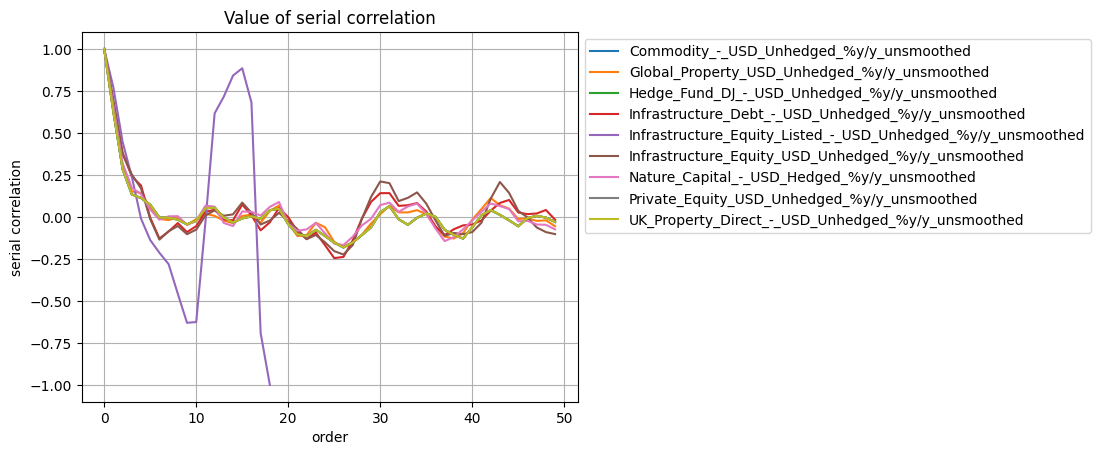

In [34]:
serial_correlation = pd.DataFrame({name+"_unsmoothed":[df[name+"_unsmoothed"].dropna().autocorr(k) for k in range (50)]
for name in alternative_asset_data.columns if "%y/y" in name})

(serial_correlation
.plot(grid = True, xlabel='order', ylabel ='serial correlation', title = 'Value of serial correlation' )
.legend(bbox_to_anchor = (1,1)))

warnings.filterwarnings('ignore', category=RuntimeWarning)

plt.show()

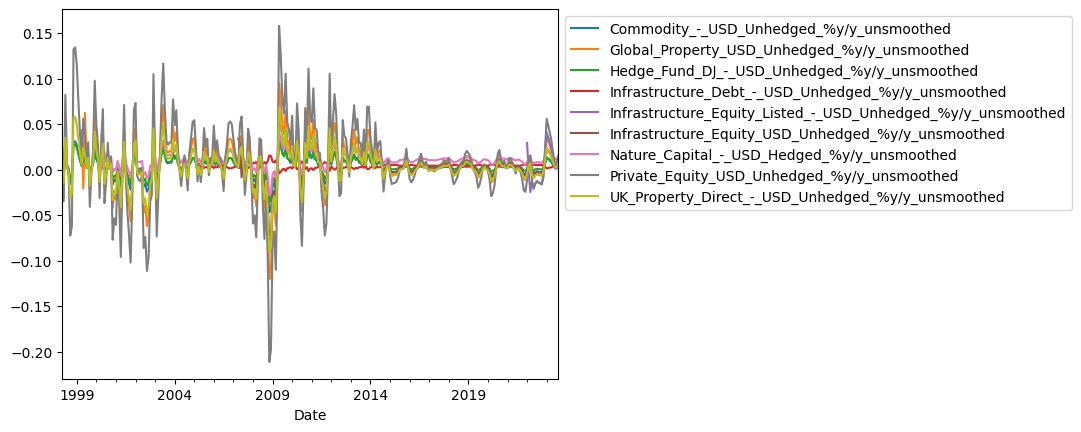

In [35]:
(df[[col for col in df.columns if "%y/y_unsmoothed" in col and "TR" not in col]].plot()
    .legend(bbox_to_anchor = (1,1)))

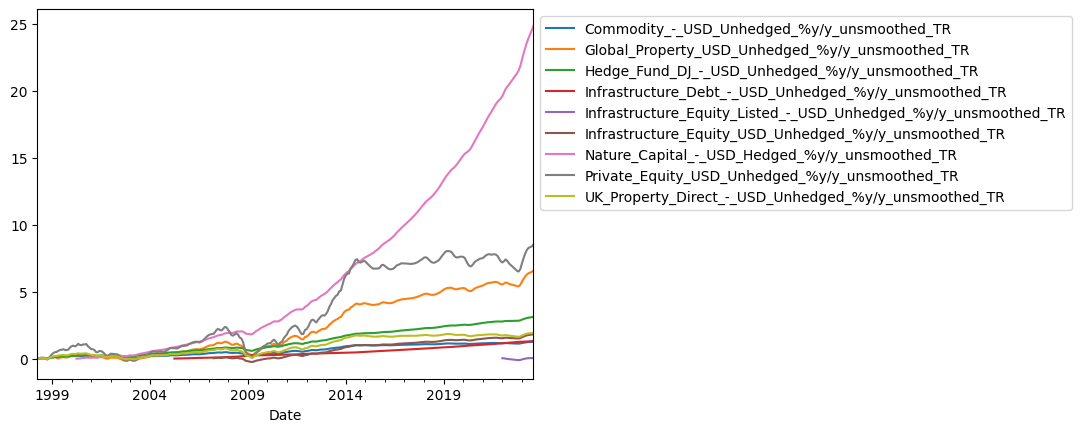

In [36]:
(df[[col for col in df.columns if "%y/y_unsmoothed_TR" in col]].plot()
    .legend(bbox_to_anchor = (1,1)))

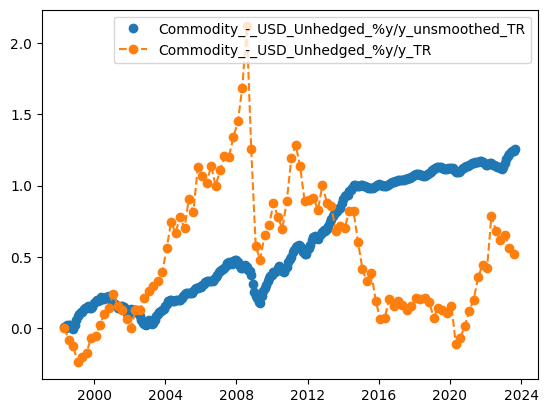

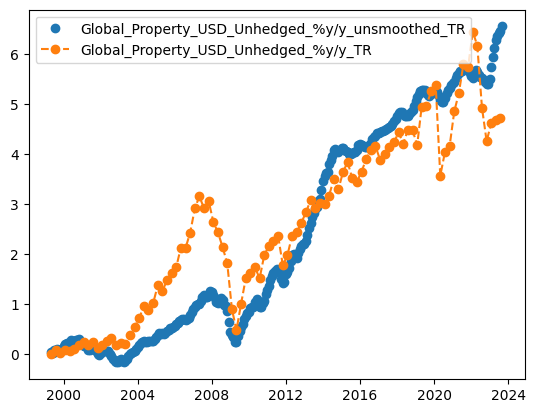

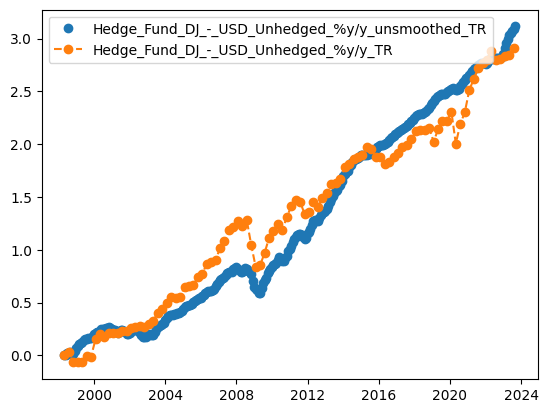

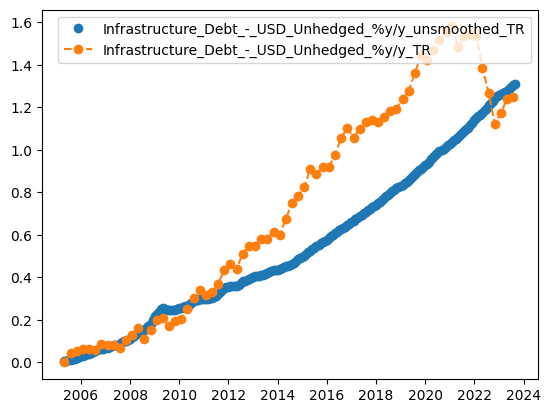

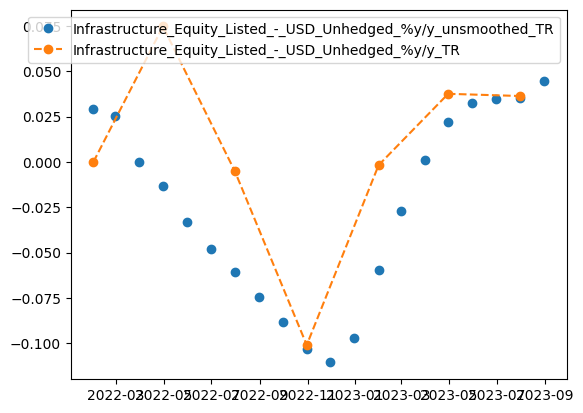

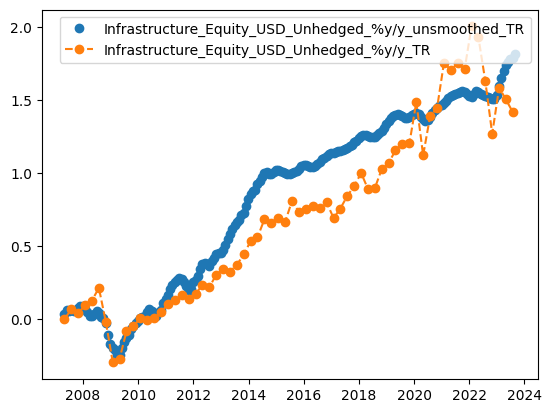

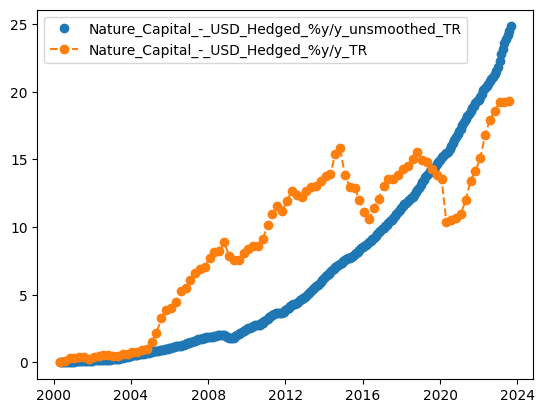

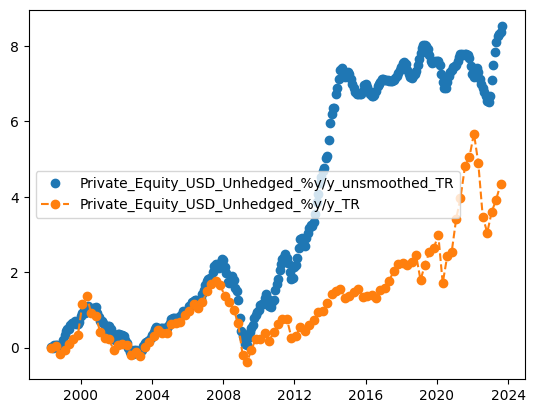

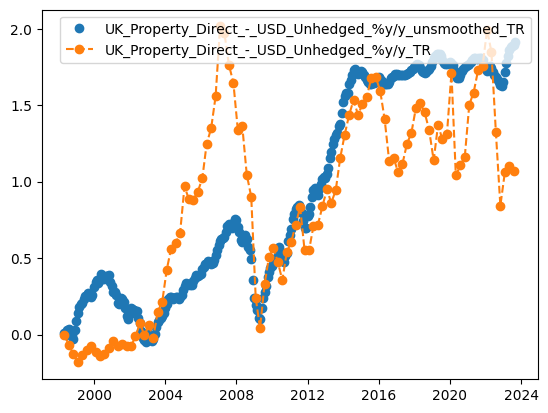

In [37]:
gen = [col for col in df.columns if "%y/y_unsmoothed_TR" in col]
for col in gen:
    plt.plot(df.index, df[col],
        marker = 'o',
        linestyle = '',
        label = col)
    plt.plot(df.index[::3], df[col[:-14]+"_TR"].iloc[::3],
        marker = 'o',
        linestyle = '--',
        label = col[:-14]+"_TR")
    plt.legend()
    plt.show()

### Getmansky avec window

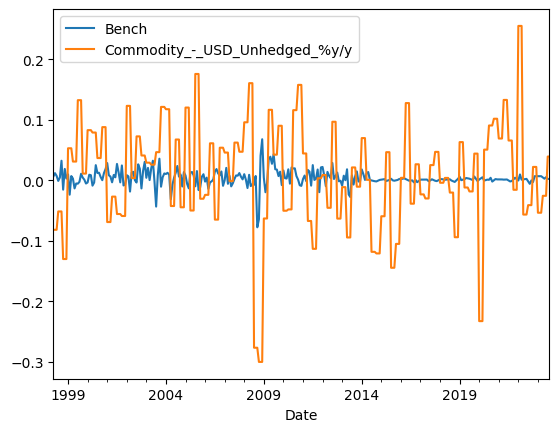

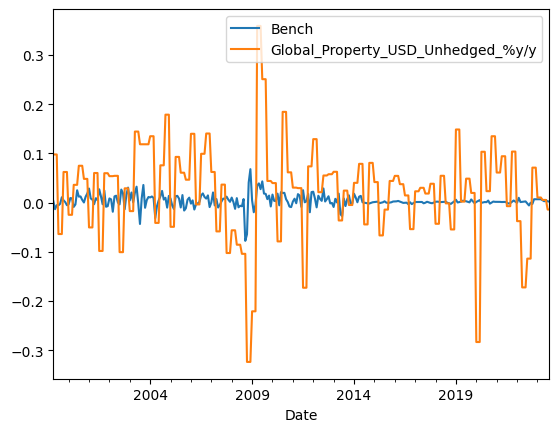

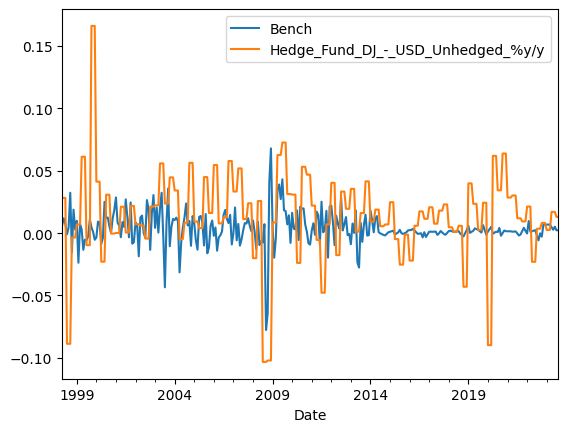

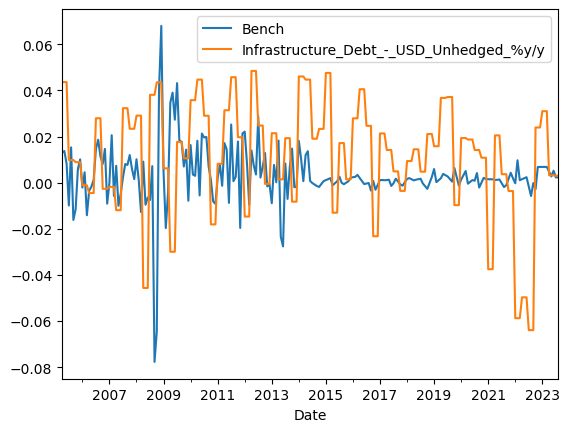

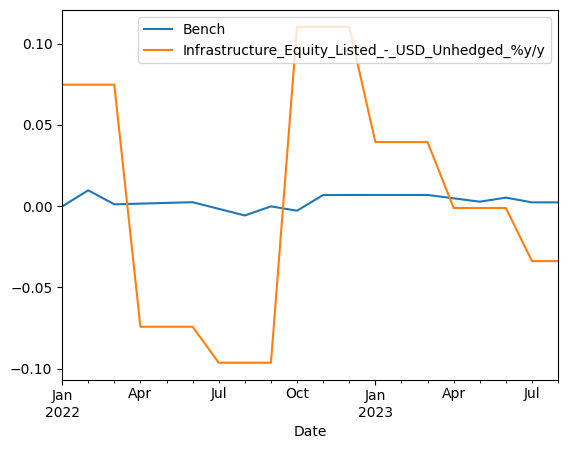

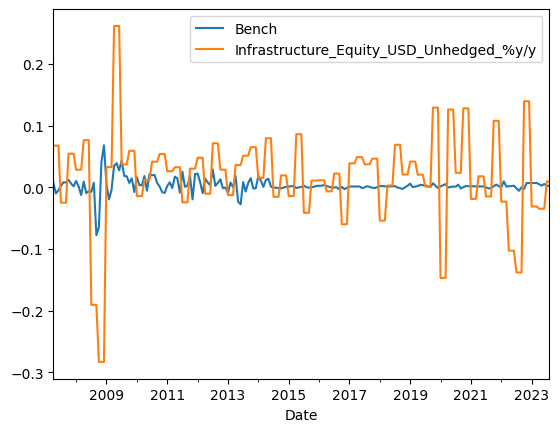

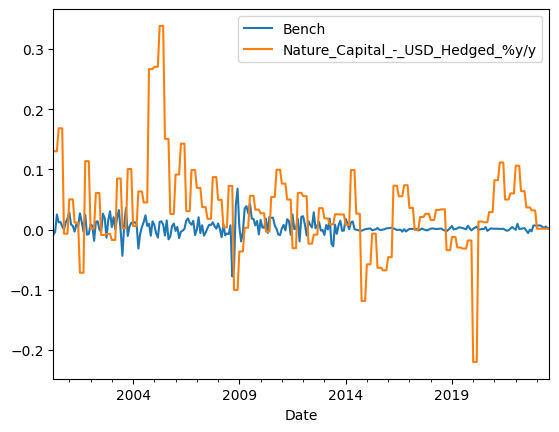

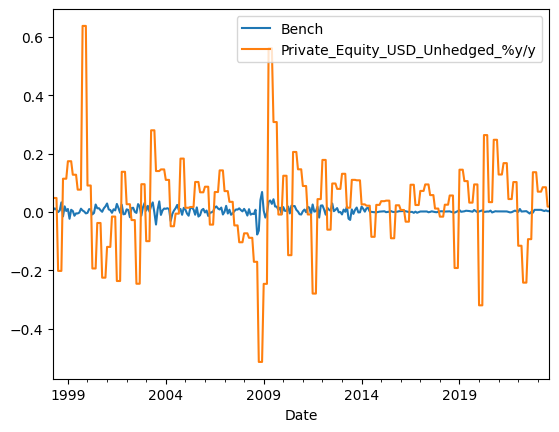

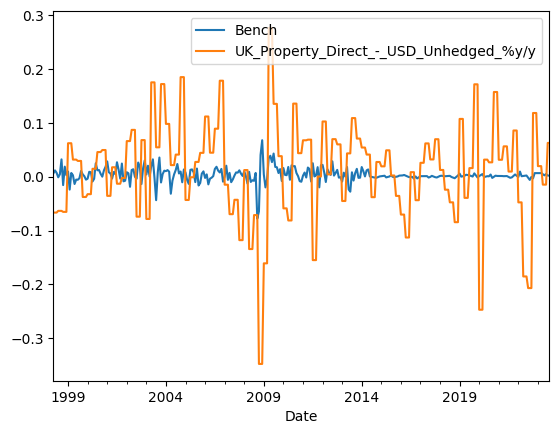

In [152]:
start_date = '2006-09-30' # format "YYYY-MM-DD"
end_date = '2016-09-30' # format "YYYY-MM-DD"
weight_type = "sumOfYears" # choose between : sumOfYears, equal, geometric or optimized
order = 2 # choose an int
window = 12 # choose an int or put None
benchmark = 'USD_Corporate_Bond_-_USD_Unhedged_%y/y' #one of the following list :
# 'Liquidity_USD_Unhedged_%y/y'
# 'US_Equity_USD_Unhedged_%y/y'
# 'US_Government_Bond_USD_Unhedged_%y/y'
# 'USD_Corporate_Bond_-_USD_Unhedged_%y/y'


df = (
    classic_asset_data
    .copy()
    .merge(alternative_asset_data, how = 'inner', left_index = True, right_index = True)
    .set_index("Date")
    #.loc[start_date:end_date]
    .iloc[1:]
)

#deal with potential missing values
if df.isna().any().any():
    df.interpolate(method='linear', inplace=True)

for col in filter(lambda x: "%y/y" in x, alternative_asset_data.columns):
    getmansky = GetmanskyModel(order)

    if weight_type != "optimized":
        getmansky.set_default_weights(weight_type)
    else:
        getmansky.optimize_weights_LR(df[benchmark].values.reshape(-1, 1), 
                  df[col].values.reshape(-1,1)
                )
    index = df[col].dropna().index
    if len(index)>1:
        bench = df.loc[index, benchmark]
        bench.plot(label = "Bench")
        df[col].dropna().plot(label = col)
        plt.legend()
        plt.show()
        getmansky.fit(bench.values.reshape(-1, 1), 
                    df[col].dropna().values.reshape(-1,1), 
                    window = window
                    )
        df[col+'_unsmoothed'] = np.nan
        try:
            df.loc[index[window:], col+'_unsmoothed'] = getmansky.predict_theorique(bench)
        except ValueError:
            pass
    else:
        warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")
        df[col+'_unsmoothed'] = 0

    


df = (
    df
    .assign(**{
        col: df[col].mul(pd.Series(
            [0 if date.month in [1, 2, 4, 5, 7, 8, 10, 11] else 1 for date in df[col].index],
            index = df[col].index
            )) 
        for col in alternative_asset_data.columns
    })
    .pipe(lambda df_temp: df_temp.assign(**{
        col + '_TR': (df_temp[col]+1).cumprod()-1
        for col in df_temp.columns if "%y/y" in col
    }))
)


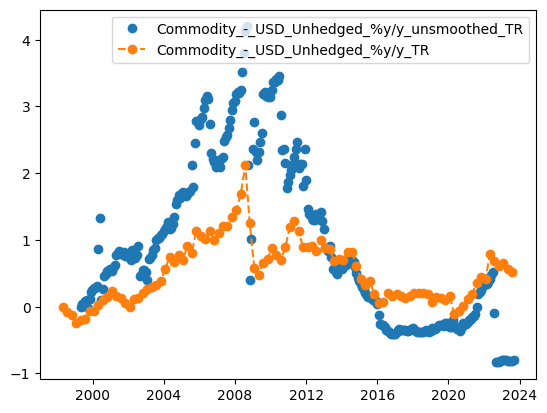

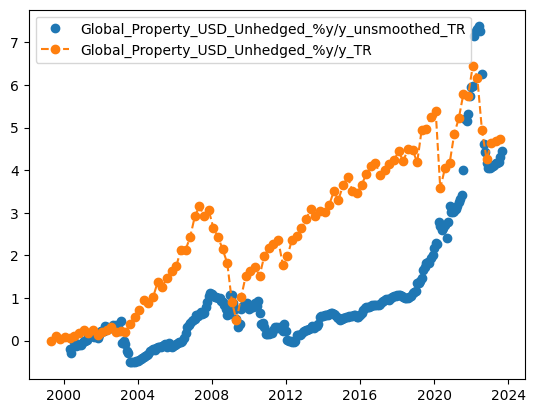

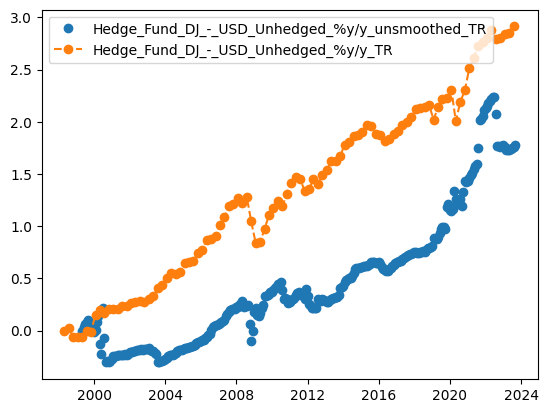

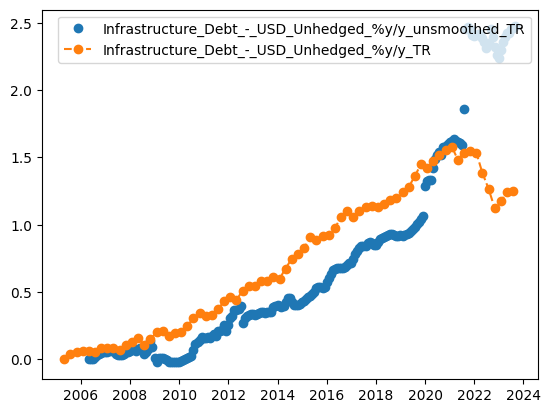

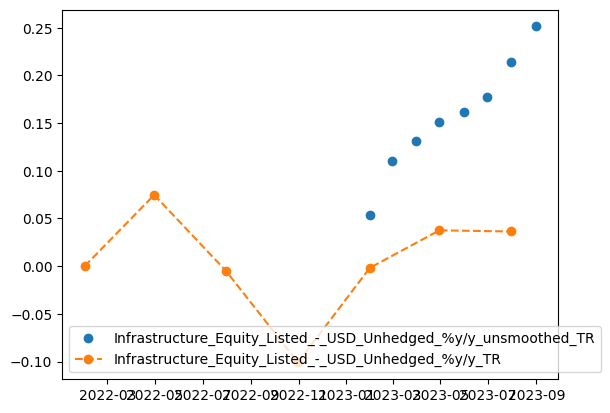

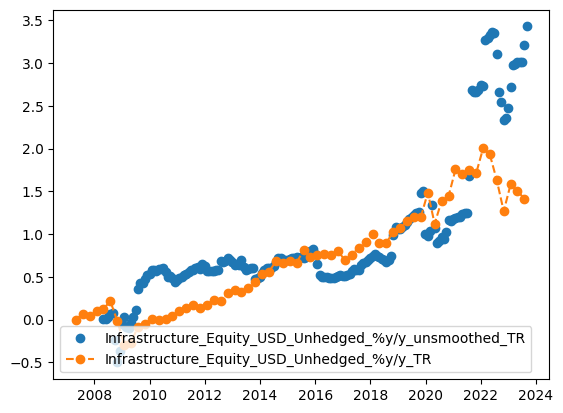

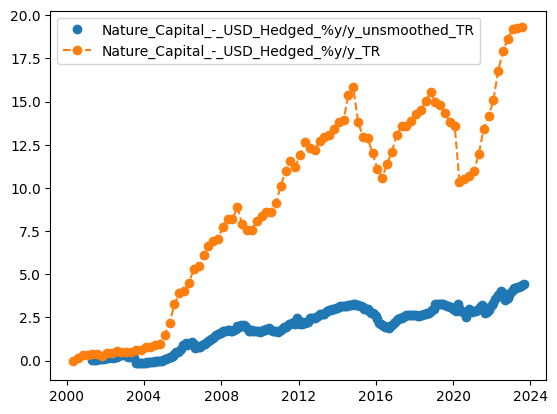

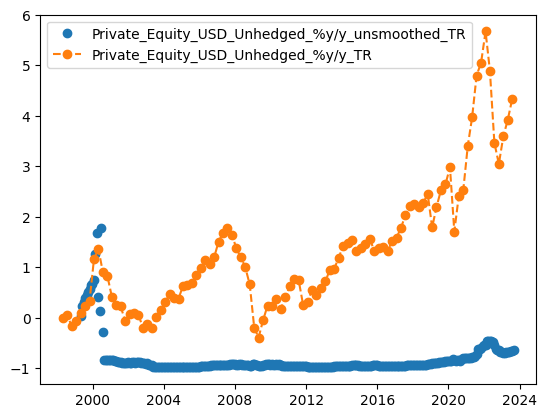

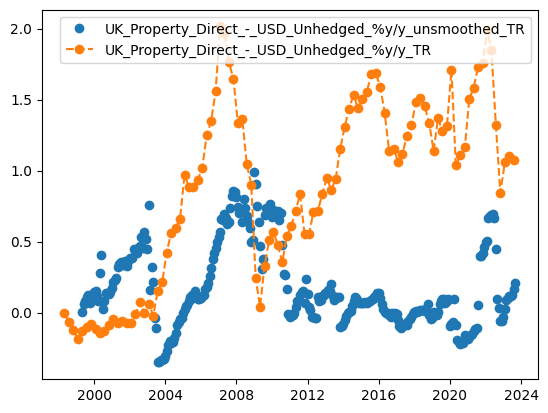

In [160]:
gen = [col for col in df.columns if "%y/y_unsmoothed_TR" in col]
for col in gen:
    plt.plot(df.index, df[col],
        marker = 'o',
        linestyle = '',
        label = col)
    plt.plot(df.index[::3], df[col[:-14]+"_TR"].iloc[::3],
        marker = 'o',
        linestyle = '--',
        label = col[:-14]+"_TR")
    # plt.plot(df.index, df[benchmark+"_TR"],
    #     marker = 'o',
    #     linestyle = '--',
    #     label = "Benchmark")
    plt.legend()
    plt.show()

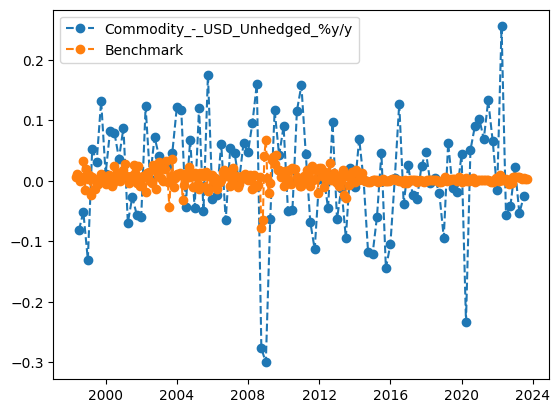

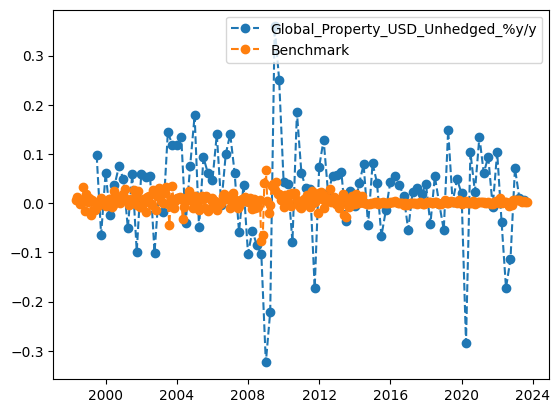

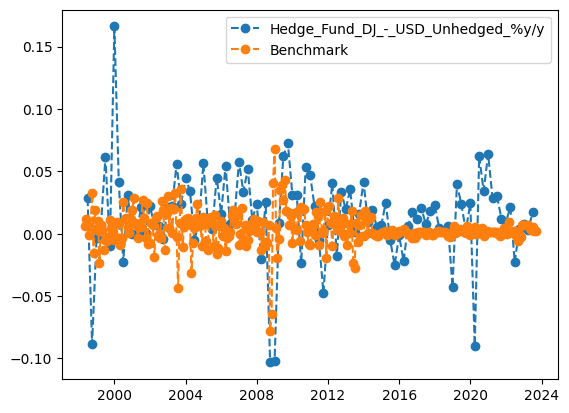

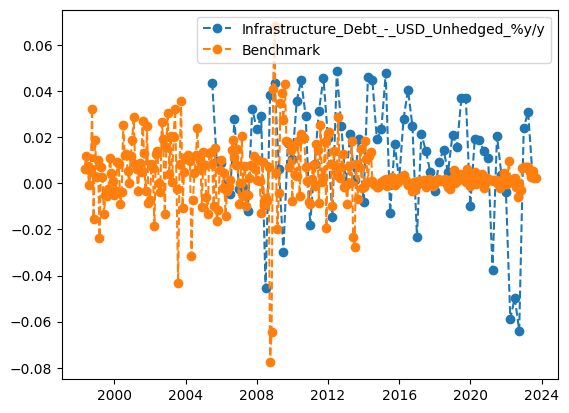

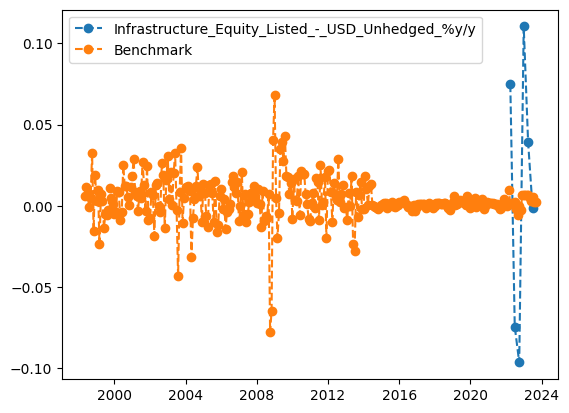

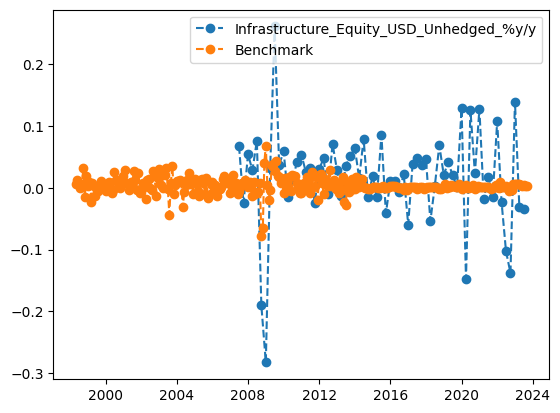

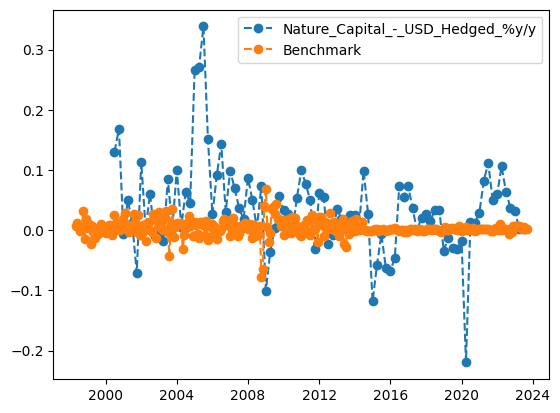

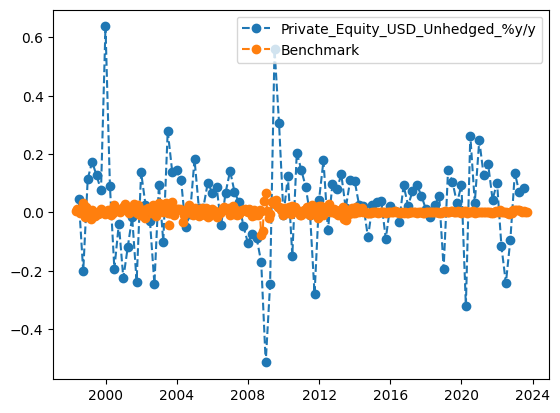

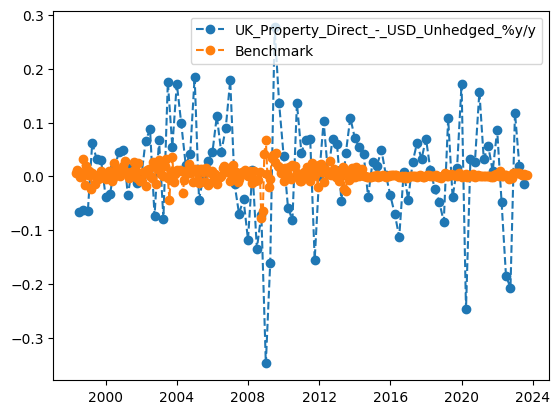

In [154]:
gen = [col for col in df.columns if "%y/y_unsmoothed_TR" in col]
for col in gen:
    plt.plot(df.index[2::3], df[col[:-14]].iloc[2::3],
        marker = 'o',
        linestyle = '--',
        label = col[:-14])
    plt.plot(df.index, df[benchmark],
        marker = 'o',
        linestyle = '--',
        label = "Benchmark")
    plt.legend()
    plt.show()

In [155]:
print("volatilité annualisé :")
volatility = pd.DataFrame({"volatilité" : [df[name].resample("QE").last().dropna().std()*np.sqrt(4)
for name in alternative_asset_data.columns if "%y/y" in name]}, index = [name for name in alternative_asset_data.columns if "%y/y" in name])
volatility

volatilité annualisé :


volatilité
Commodity_-_USD_Unhedged_%y/y                       0.179158
Global_Property_USD_Unhedged_%y/y                   0.196396
Hedge_Fund_DJ_-_USD_Unhedged_%y/y                   0.070764
Infrastructure_Debt_-_USD_Unhedged_%y/y             0.049742
Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y    0.149915
Infrastructure_Equity_USD_Unhedged_%y/y             0.154062
Nature_Capital_-_USD_Hedged_%y/y                    0.149982
Private_Equity_USD_Unhedged_%y/y                    0.316194
UK_Property_Direct_-_USD_Unhedged_%y/y              0.187545

In [156]:
print("volatilité annualisé unsmoothed:")
volatility = pd.DataFrame({"volatilité" : [df[name+"_unsmoothed"].dropna().std()*np.sqrt(12)
for name in alternative_asset_data.columns if "%y/y" in name]}, index = [name+"_unsmoothed" for name in alternative_asset_data.columns if "%y/y" in name])
volatility

volatilité annualisé unsmoothed:


volatilité
Commodity_-_USD_Unhedged_%y/y_unsmoothed              0.374029
Global_Property_USD_Unhedged_%y/y_unsmoothed          0.246246
Hedge_Fund_DJ_-_USD_Unhedged_%y/y_unsmoothed          0.174816
Infrastructure_Debt_-_USD_Unhedged_%y/y_unsmoothed    0.079284
Infrastructure_Equity_Listed_-_USD_Unhedged_%y/...    0.059942
Infrastructure_Equity_USD_Unhedged_%y/y_unsmoothed    0.257357
Nature_Capital_-_USD_Hedged_%y/y_unsmoothed           0.126841
Private_Equity_USD_Unhedged_%y/y_unsmoothed           0.509437
UK_Property_Direct_-_USD_Unhedged_%y/y_unsmoothed     0.232611

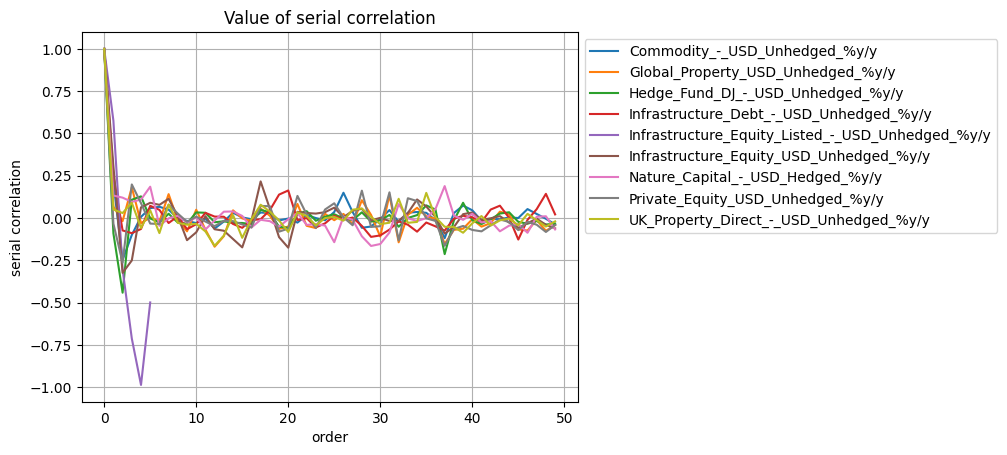

In [157]:
serial_correlation = pd.DataFrame({name:[df[name+"_unsmoothed"].dropna().autocorr(k) for k in range (50)]
for name in alternative_asset_data.columns if "%y/y" in name})

(serial_correlation
.plot(grid = True, xlabel='order', ylabel ='serial correlation', title = 'Value of serial correlation' )
.legend(bbox_to_anchor = (1,1)))

warnings.filterwarnings('ignore', category=RuntimeWarning)

plt.show()

### Délire de la correlation

In [161]:
(pd.DataFrame({name: df[name].dropna()
for name in alternative_asset_data.columns if "%y/y" in name})
.resample("QE")
.last()
.corr()
.dropna(how='all', axis = 0)
.dropna(how='all', axis = 1)
.style
.format(precision = 2)
.background_gradient(cmap = 'RdYlGn', vmin = -1, vmax = 1, axis = None)
#.to_latex('base.tex')
)

In [162]:
(pd.DataFrame({name+"_unsmoothed": df[name+"_unsmoothed"].dropna()
for name in alternative_asset_data.columns if "%y/y" in name})
.resample("QE")
.last()
.corr()
.dropna(how='all', axis = 0)
.dropna(how='all', axis = 1)
.style
.format(precision = 2)
.background_gradient(cmap = 'RdYlGn', vmin = -1, vmax = 1, axis = None)
#.to_latex("autocorrel_unsmoothed.tex")
)

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/4265356007.py:48: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


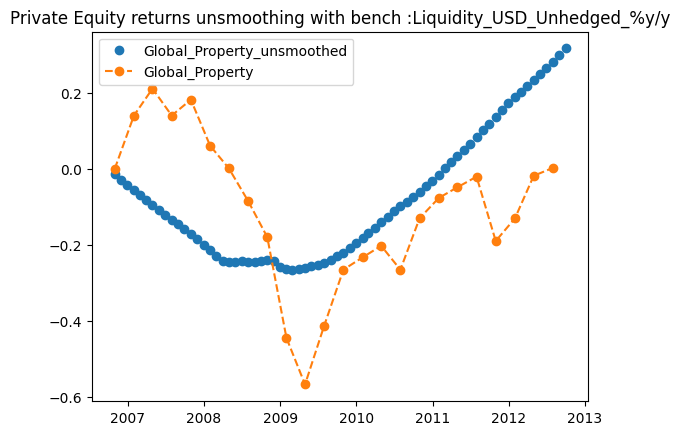

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/4265356007.py:48: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


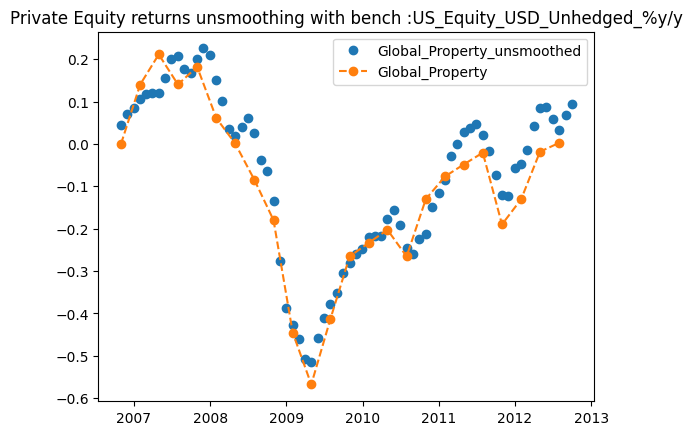

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/4265356007.py:48: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


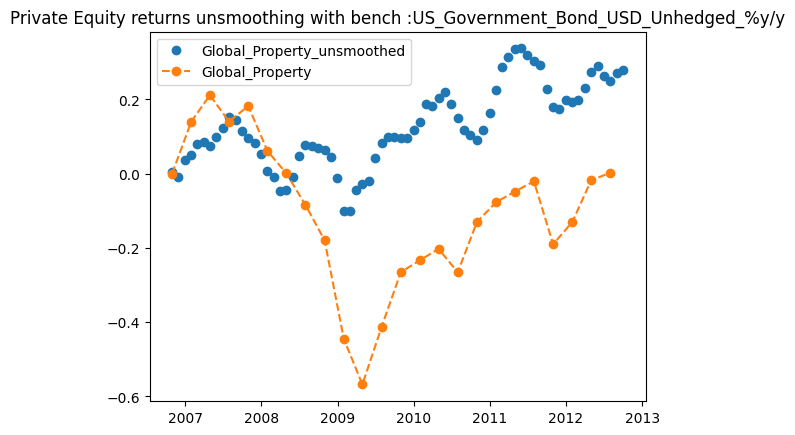

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/4265356007.py:48: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


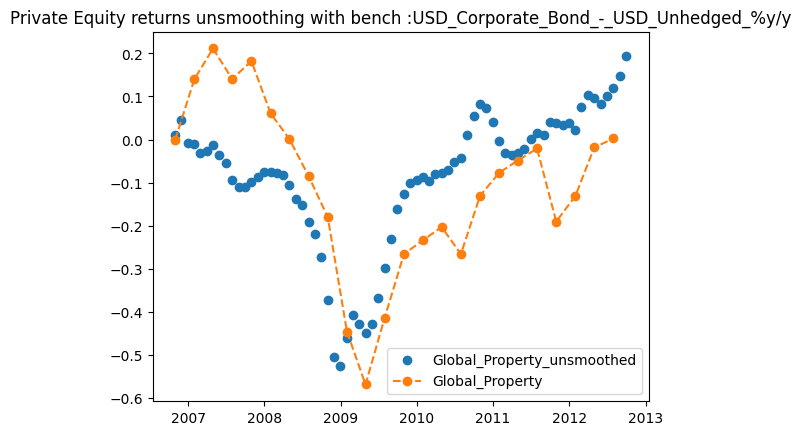

In [148]:
start_date = '2006-09-30' # format "YYYY-MM-DD"
end_date = '2012-09-30' # format "YYYY-MM-DD"
weight_type = "sumOfYears" # choose between : sumOfYears, equal, geometric or optimized
order = 2 # choose an int
window = None # choose an int or put None
benchmark = 'US_Equity_USD_Unhedged_%y/y' #one of the following list :
# 'Liquidity_USD_Unhedged_%y/y'
# 'US_Equity_USD_Unhedged_%y/y'
# 'US_Government_Bond_USD_Unhedged_%y/y'
# 'USD_Corporate_Bond_-_USD_Unhedged_%y/y'

for benchmark in ['Liquidity_USD_Unhedged_%y/y', 
                  'US_Equity_USD_Unhedged_%y/y',
                  'US_Government_Bond_USD_Unhedged_%y/y',
                  'USD_Corporate_Bond_-_USD_Unhedged_%y/y']:
    df = (
        classic_asset_data
        .copy()
        .merge(alternative_asset_data, how = 'inner', left_index = True, right_index = True)
        .set_index("Date")
        .loc[start_date:end_date]
        .iloc[1:]
    )

    #deal with potential missing values
    if df.isna().any().any():
        df.interpolate(method='linear', inplace=True)

    for col in filter(lambda x: "%y/y" in x, alternative_asset_data.columns):
        getmansky = GetmanskyModel(order)

        if weight_type != "optimized":
            getmansky.set_default_weights(weight_type)
        else:
            getmansky.optimize_weights_LR(df[benchmark].values.reshape(-1, 1), 
                    df[col].values.reshape(-1,1)
                    )
        index = df[col].dropna().index
        if len(index)>3:
            bench = df.loc[index, benchmark]

            getmansky.fit(bench.values.reshape(-1, 1), 
                        df[col].dropna().values.reshape(-1,1), 
                        window = window
                        )
            df.loc[index[window:], col+'_unsmoothed'] = getmansky.predict(bench)
        else:
            warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")
            df[col+'_unsmoothed'] = 0


    df = (
        df
        .assign(**{
            col: df[col].mul(pd.Series(
                [0 if date.month in [1, 2, 4, 5, 7, 8, 10, 11] else 1 for date in df[col].index],
                index = df[col].index
                )) 
            for col in alternative_asset_data.columns
        })
        .pipe(lambda df_temp: df_temp.assign(**{
            col + '_TR': (df_temp[col]+1).cumprod()-1
            for col in df_temp.columns if "%y/y" in col
        }))
    )



    fig, axes = plt.subplots()

    plt.title("Private Equity returns unsmoothing with bench :" + benchmark)

    plt.plot(df.index, df["Global_Property_USD_Unhedged_%y/y_unsmoothed_TR"],
            marker = 'o',
            linestyle = '',
            label = "Global_Property_unsmoothed")
    plt.plot(df.index[::3], df['Global_Property_USD_Unhedged_%y/y_TR'].iloc[::3],
            marker = 'o',
            linestyle = '--',
            label = "Global_Property")

    plt.legend()
    plt.show()

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/3524744537.py:47: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


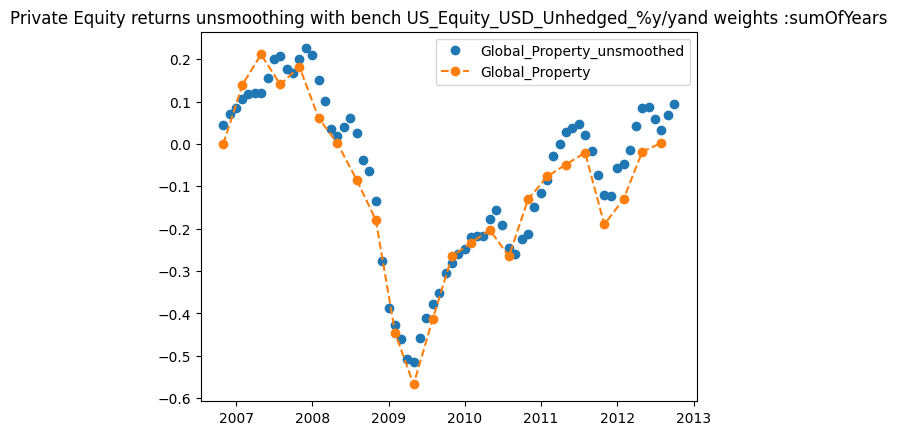

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/3524744537.py:47: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


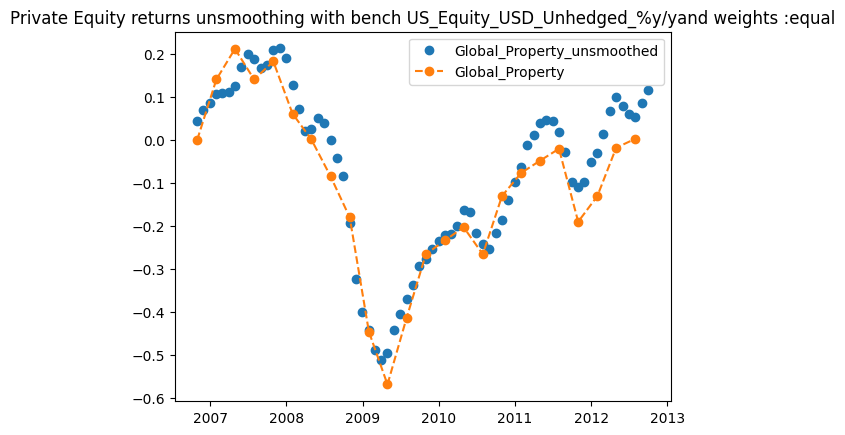

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/3524744537.py:47: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


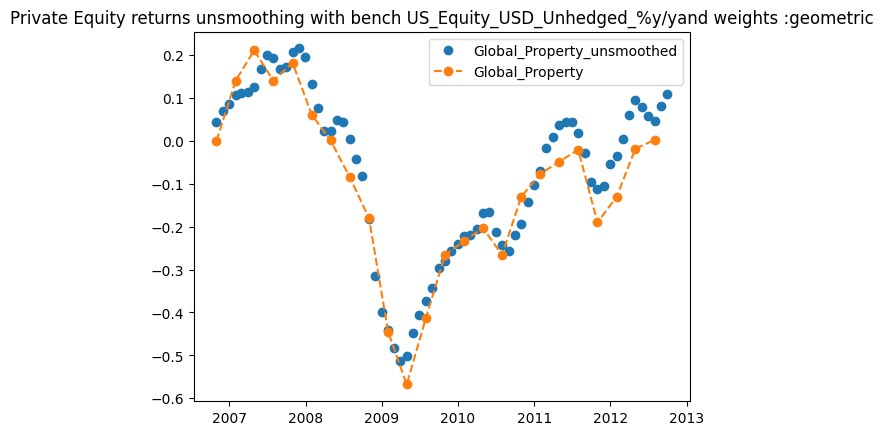

/var/folders/8k/vtlzy2q90b7cbr81gv961g_w0000gn/T/ipykernel_44856/3524744537.py:47: UserWarning: Be careful, Infrastructure_Equity_Listed_-_USD_Unhedged_%y/y has no value for the selected timeframe.
  warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")


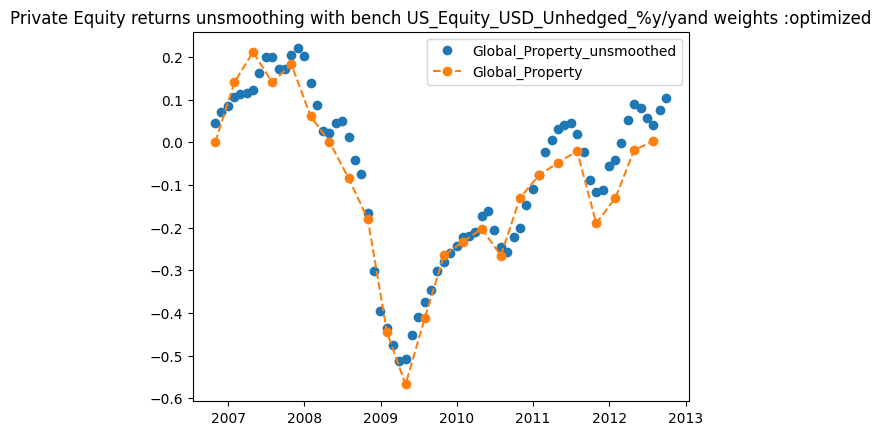

In [149]:
start_date = '2006-09-30' # format "YYYY-MM-DD"
end_date = '2012-09-30' # format "YYYY-MM-DD"
weight_type = "sumOfYears" # choose between : sumOfYears, equal, geometric or optimized
order = 2 # choose an int
window = None # choose an int or put None
benchmark = 'US_Equity_USD_Unhedged_%y/y' #one of the following list :
# 'Liquidity_USD_Unhedged_%y/y'
# 'US_Equity_USD_Unhedged_%y/y'
# 'US_Government_Bond_USD_Unhedged_%y/y'
# 'USD_Corporate_Bond_-_USD_Unhedged_%y/y'
warnings.filterwarnings('ignore', category=FutureWarning)

for weight_type in ["sumOfYears", "equal", "geometric", "optimized"]:
    df = (
        classic_asset_data
        .copy()
        .merge(alternative_asset_data, how = 'inner', left_index = True, right_index = True)
        .set_index("Date")
        .loc[start_date:end_date]
        .iloc[1:]
    )

    #deal with potential missing values
    if df.isna().any().any():
        df.interpolate(method='linear', inplace=True)

    for col in filter(lambda x: "%y/y" in x, alternative_asset_data.columns):
        getmansky = GetmanskyModel(order)
        if weight_type != "optimized":
            getmansky.set_default_weights(weight_type, delta = 0.9)
        elif np.isnan(df[col].values).sum()==0:
            getmansky.optimize_weights_LR(df[benchmark].values, 
                    df[col].values
                )
        else:
            df[col+'_unsmoothed'] = 0
        index = df[col].dropna().index
        if len(index)>3:
            bench = df.loc[index, benchmark]

            getmansky.fit(bench.values.reshape(-1, 1), 
                        df[col].dropna().values.reshape(-1,1), 
                        window = window
                        )
            df.loc[index[window:], col+'_unsmoothed'] = getmansky.predict(bench)
        else:
            warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")
            df[col+'_unsmoothed'] = 0


    df = (
        df
        .assign(**{
            col: df[col].mul(pd.Series(
                [0 if date.month in [1, 2, 4, 5, 7, 8, 10, 11] else 1 for date in df[col].index],
                index = df[col].index
                )) 
            for col in alternative_asset_data.columns
        })
        .pipe(lambda df_temp: df_temp.assign(**{
            col + '_TR': (df_temp[col]+1).cumprod()-1
            for col in df_temp.columns if "%y/y" in col
        }))
    )



    fig, axes = plt.subplots()

    plt.title("Private Equity returns unsmoothing with bench " + benchmark + "and weights :" +weight_type)

    plt.plot(df.index, df["Global_Property_USD_Unhedged_%y/y_unsmoothed_TR"],
            marker = 'o',
            linestyle = '',
            label = "Global_Property_unsmoothed")
    plt.plot(df.index[::3], df['Global_Property_USD_Unhedged_%y/y_TR'].iloc[::3],
            marker = 'o',
            linestyle = '--',
            label = "Global_Property")

    plt.legend()
    plt.show()




# TEST LOL parce que Getmansky bon

0.4181352715748122 0.001292332212551139
1.0810436347504526 0.004175440177247146
0.3383298345851702 0.0035253171475798308
-0.09956658603084637 0.004152554529396101
1.4754322982388144 -0.0016248295511886676
0.710857938087902 0.0034795771718729553
0.33887510065521026 0.010906416905172219
1.8535964315770743 0.0021246649913607978
0.7982925401219927 0.0009764498037438433


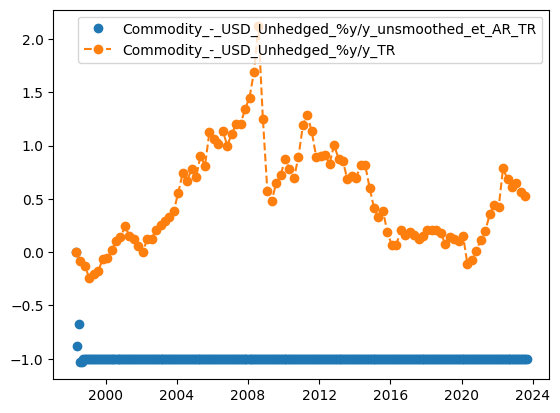

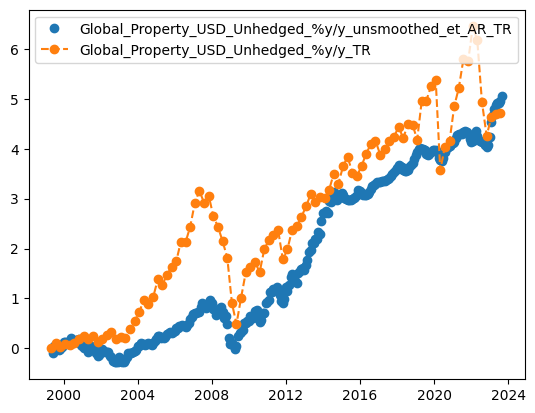

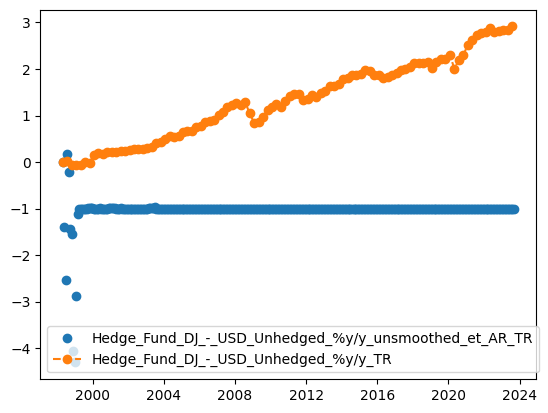

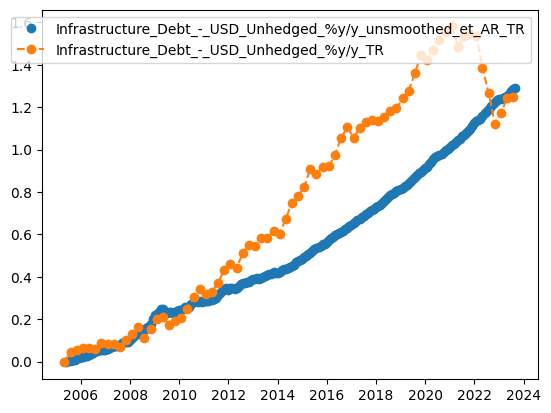

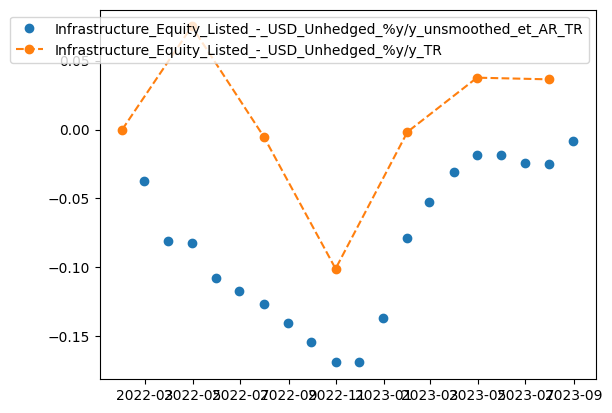

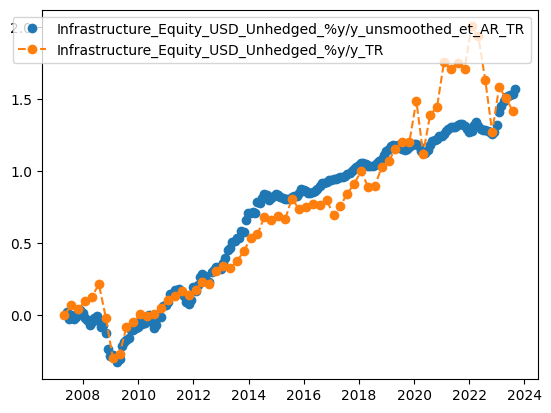

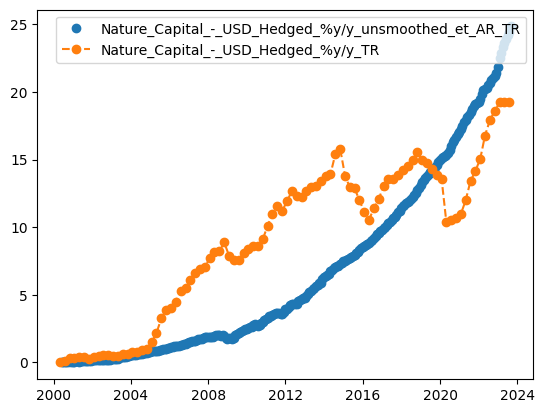

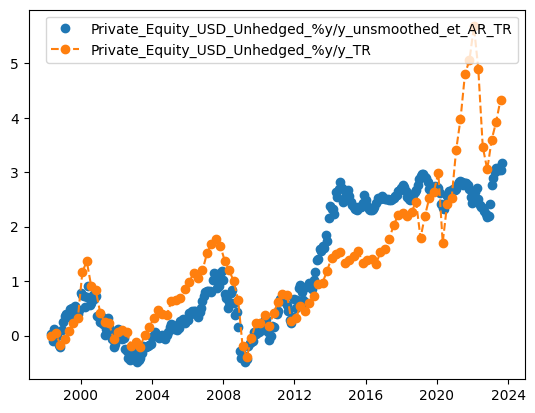

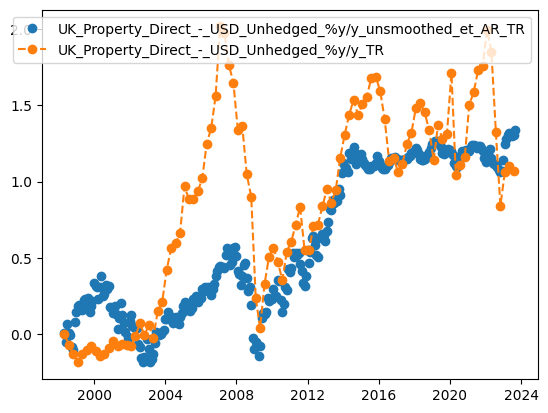

In [150]:
from AR_Model import AR_functions

start_date = '2006-09-30' # format "YYYY-MM-DD"
end_date = '2012-09-30' # format "YYYY-MM-DD"
weight_type = "sumOfYears" # choose between : sumOfYears, equal, geometric or optimized
order = 2 # choose an int
window = None # choose an int or put None
benchmark = 'US_Equity_USD_Unhedged_%y/y' #one of the following list :
# 'Liquidity_USD_Unhedged_%y/y'
# 'US_Equity_USD_Unhedged_%y/y'
# 'US_Government_Bond_USD_Unhedged_%y/y'
# 'USD_Corporate_Bond_-_USD_Unhedged_%y/y'


df = (
    classic_asset_data
    .copy()
    .merge(alternative_asset_data, how = 'inner', left_index = True, right_index = True)
    .set_index("Date")
    #.loc[start_date:end_date]
    .iloc[1:]
)

#deal with potential missing values
if df.isna().any().any():
    df.interpolate(method='linear', inplace=True)

for col in filter(lambda x: "%y/y" in x, alternative_asset_data.columns):
    getmansky = GetmanskyModel(order)

    if weight_type != "optimized":
        getmansky.set_default_weights(weight_type)
    else:
        getmansky.optimize_weights_LR(df[benchmark].values.reshape(-1, 1), 
                  df[col].values.reshape(-1,1)
                )
    index = df[col].dropna().index
    if len(index)>3:
        bench = df.loc[index, benchmark]

        getmansky.fit(bench.values.reshape(-1, 1), 
                    df[col].dropna().values.reshape(-1,1), 
                    window = window
                    )
        df.loc[index[window:], col+'_unsmoothed'] = getmansky.predict(bench)
        print(getmansky.beta, getmansky.mu)
    else:
        warnings.warn(f"Be careful, {col} has no value for the selected timeframe.")
        df[col+'_unsmoothed'] = 0

for col in filter(lambda x: "%y/y_unsmoothed" in x, df.columns):
    df[col+"_et_AR"] = AR_model(df[col].values)


df = (
    df
    .assign(**{
        col: df[col].mul(pd.Series(
            [0 if date.month in [1, 2, 4, 5, 7, 8, 10, 11] else 1 for date in df[col].index],
            index = df[col].index
            )) 
        for col in alternative_asset_data.columns
    })
    .pipe(lambda df_temp: df_temp.assign(**{
        col + '_TR': (df_temp[col]+1).cumprod()-1
        for col in df_temp.columns if "%y/y" in col
    }))
)
df


gen = [col for col in df.columns if "%y/y_unsmoothed_et_AR_TR" in col]
for col in gen:
    plt.plot(df.index, df[col],
        marker = 'o',
        linestyle = '',
        label = col)
    plt.plot(df.index[::3], df[col[:-20]+"_TR"].iloc[::3],
        marker = 'o',
        linestyle = '--',
        label = col[:-20]+"_TR")
    plt.legend()
    plt.show()

In [151]:
print("volatilité annualisé unsmoothed :")
volatility = pd.DataFrame({"volatilité" : [df[name+"_unsmoothed"].dropna().std()*np.sqrt(12)
for name in alternative_asset_data.columns if "%y/y" in name]}, index = [name+"_unsmoothed" for name in alternative_asset_data.columns if "%y/y" in name])
volatility

volatilité annualisé unsmoothed :


volatilité
Commodity_-_USD_Unhedged_%y/y_unsmoothed              0.035714
Global_Property_USD_Unhedged_%y/y_unsmoothed          0.089987
Hedge_Fund_DJ_-_USD_Unhedged_%y/y_unsmoothed          0.028898
Infrastructure_Debt_-_USD_Unhedged_%y/y_unsmoothed    0.007740
Infrastructure_Equity_Listed_-_USD_Unhedged_%y/...    0.069919
Infrastructure_Equity_USD_Unhedged_%y/y_unsmoothed    0.057651
Nature_Capital_-_USD_Hedged_%y/y_unsmoothed           0.028112
Private_Equity_USD_Unhedged_%y/y_unsmoothed           0.158322
UK_Property_Direct_-_USD_Unhedged_%y/y_unsmoothed     0.068185

## Comparison Getmansky vs AR(1)